# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

## Откройте файл с данными и изучите общую информацию.

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('real_estate_data.csv', sep='\t')

### Описание данных
·	airports_nearest — расстояние до ближайшего аэропорта в метрах (м)  
·	balcony — число балконов  
·	ceiling_height — высота потолков (м)  
·	cityCenters_nearest — расстояние до центра города (м)  
·	days_exposition — сколько дней было размещено объявление (от публикации до снятия)  
·	first_day_exposition — дата публикации  
·	floor — этаж  
·	floors_total — всего этажей в доме  
·	is_apartment — апартаменты (булев тип)  
·	kitchen_area — площадь кухни в квадратных метрах (м²)  
·	last_price — цена на момент снятия с публикации  
·	living_area — жилая площадь в квадратных метрах (м²)  
·	locality_name — название населённого пункта  
·	open_plan — свободная планировка (булев тип)  
·	parks_around3000 — число парков в радиусе 3 км  
·	parks_nearest — расстояние до ближайшего парка (м)  
·	ponds_around3000 — число водоёмов в радиусе 3 км  
·	ponds_nearest — расстояние до ближайшего водоёма (м)  
·	rooms — число комнат  
·	studio — квартира-студия (булев тип)  
·	total_area — общая площадь квартиры в квадратных метрах (м²)  
·	total_images — число фотографий квартиры в объявлении  

### Изучим общую информацию о полученном датафрейме.

In [ ]:
pd.set_option('display.max_columns', None)
data.head()

total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0  2019-03-07T00:00:00      3   
1             7   3350000.0        40.4  2018-12-04T00:00:00      1   
2            10   5196000.0        56.0  2015-08-20T00:00:00      2   
3             0  64900000.0       159.0  2015-07-24T00:00:00      3   
4             2  10000000.0       100.0  2018-06-19T00:00:00      2   

   ceiling_height  floors_total  living_area  floor is_apartment  studio  \
0            2.70          16.0         51.0      8          NaN   False   
1             NaN          11.0         18.6      1          NaN   False   
2             NaN           5.0         34.3      4          NaN   False   
3             NaN          14.0          NaN      9          NaN   False   
4            3.03          14.0         32.0     13          NaN   False   

   open_plan  kitchen_area  balcony    locality_name  airports_nearest  \
0      False          25.0      NaN  Санкт-Петербург           18863.0   
1      False          11.0      2.0   посёлок Шушары           12817.0   
2      False           8.3      0.0  Санкт-Петербург           21741.0   
3      False           NaN      0.0  Санкт-Петербург           28098.0   
4      False          41.0      NaN  Санкт-Петербург           31856.0   

   cityCenters_nearest  parks_around3000  parks_nearest  ponds_around3000  \
0              16028.0               1.0          482.0               2.0   
1              18603.0               0.0            NaN               0.0   
2              13933.0               1.0           90.0               2.0   
3               6800.0               2.0           84.0               3.0   
4               8098.0               2.0          112.0               1.0   

   ponds_nearest  days_exposition  
0          755.0              NaN  
1            NaN             81.0  
2          574.0            558.0  
3          234.0            424.0  
4           48.0            121.0

часть столбцов заменилась на "...". Чтобы это исправить, нужно увеличить максимальное количество отображающихся столбцов командой

	pd.set_option('display.max_columns', None)
</div>

In [ ]:
data.describe()

total_images    last_price    total_area         rooms  ceiling_height  \
count  23699.000000  2.369900e+04  23699.000000  23699.000000    14504.000000   
mean       9.858475  6.541549e+06     60.348651      2.070636        2.771499   
std        5.682529  1.088701e+07     35.654083      1.078405        1.261056   
min        0.000000  1.219000e+04     12.000000      0.000000        1.000000   
25%        6.000000  3.400000e+06     40.000000      1.000000        2.520000   
50%        9.000000  4.650000e+06     52.000000      2.000000        2.650000   
75%       14.000000  6.800000e+06     69.900000      3.000000        2.800000   
max       50.000000  7.630000e+08    900.000000     19.000000      100.000000   

       floors_total   living_area         floor  kitchen_area       balcony  \
count  23613.000000  21796.000000  23699.000000  21421.000000  12180.000000   
mean      10.673824     34.457852      5.892358     10.569807      1.150082   
std        6.597173     22.030445      4.885249      5.905438      1.071300   
min        1.000000      2.000000      1.000000      1.300000      0.000000   
25%        5.000000     18.600000      2.000000      7.000000      0.000000   
50%        9.000000     30.000000      4.000000      9.100000      1.000000   
75%       16.000000     42.300000      8.000000     12.000000      2.000000   
max       60.000000    409.700000     33.000000    112.000000      5.000000   

       airports_nearest  cityCenters_nearest  parks_around3000  parks_nearest  \
count      18157.000000         18180.000000      18181.000000    8079.000000   
mean       28793.672193         14191.277833          0.611408     490.804555   
std        12630.880622          8608.386210          0.802074     342.317995   
min            0.000000           181.000000          0.000000       1.000000   
25%        18585.000000          9238.000000          0.000000     288.000000   
50%        26726.000000         13098.500000          0.000000     455.000000   
75%        37273.000000         16293.000000          1.000000     612.000000   
max        84869.000000         65968.000000          3.000000    3190.000000   

       ponds_around3000  ponds_nearest  days_exposition  
count      18181.000000    9110.000000     20518.000000  
mean           0.770255     517.980900       180.888634  
std            0.938346     277.720643       219.727988  
min            0.000000      13.000000         1.000000  
25%            0.000000     294.000000        45.000000  
50%            1.000000     502.000000        95.000000  
75%            1.000000     729.000000       232.000000  
max            3.000000    1344.000000      1580.000000

Методо .describe() не вывел данные типа bool, object


### Основные данные, которые должны коррелировать относительно друг друга.  
last_price — цена на момент снятия с публикации  
living_area — жилая площадь в квадратных метрах (м²)  

<Axes: xlabel='last_price', ylabel='living_area'>

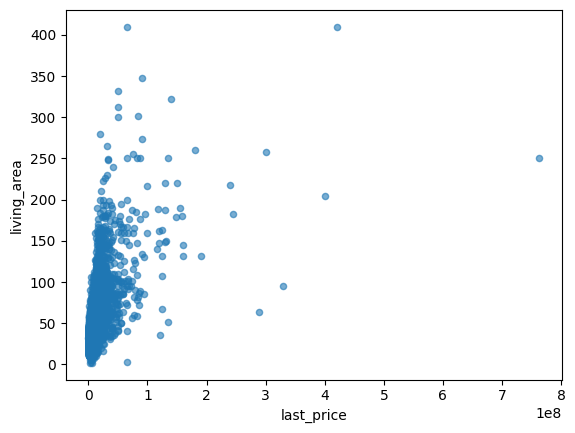

In [ ]:
data.plot(x='last_price', y='living_area', kind='scatter', alpha=0.6)

<font color='green'>
    На данном графике видно, что основное распределение данных о площади и стоимости квартир лежит в диапазоне до 200 м2 и до 10 млн. рублей</font>

### Построим гистограмму для всех числовых столбцов таблицы

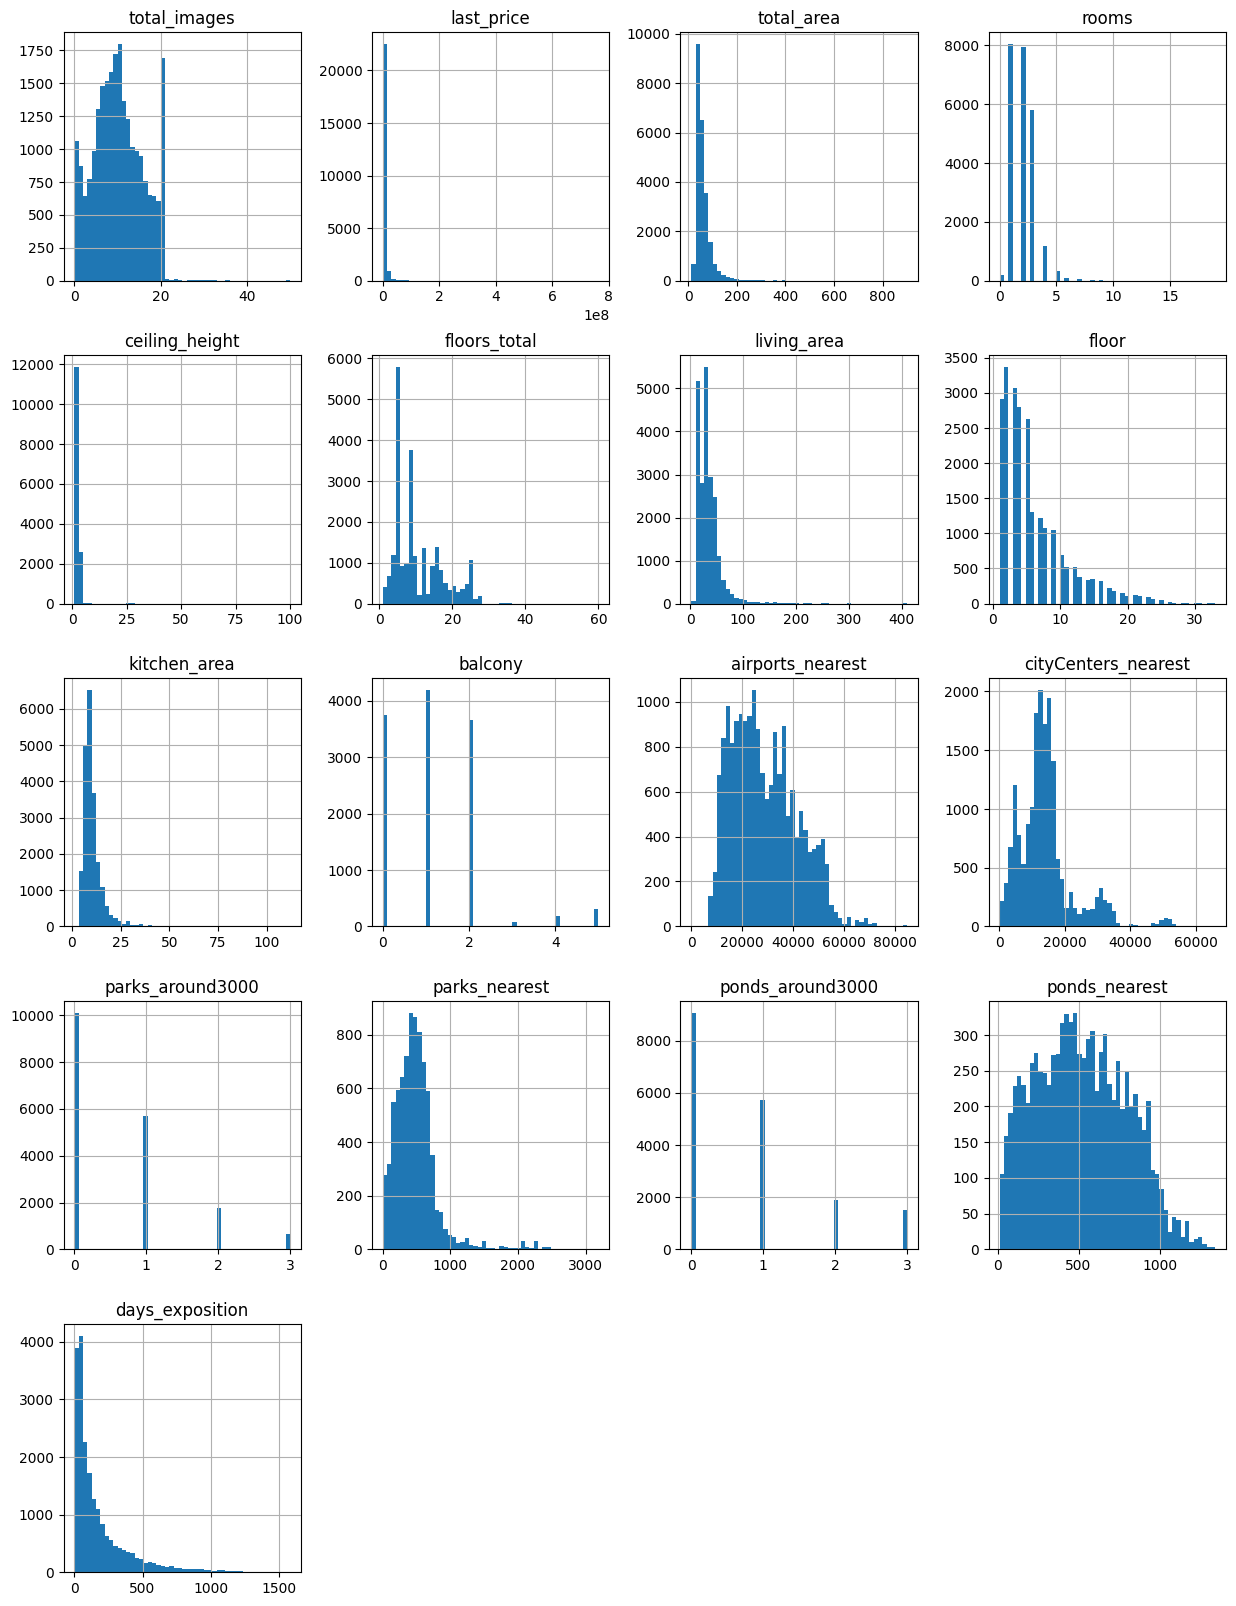

In [ ]:
data.hist(bins=50, figsize=(15, 20));

#### Посмотрим информацию о типах данных в столбцах и пропусках

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

<div class="alert alert-info">
<b>Ниже короткий вывод о проблемах с данными (пропуски, дубликаты, неверный тип данных, странные значения и т.д.)  </b>
</div>

#### Анализ пропусков
<font color='green'>
    При общем количестве строк - 23699, пропуски наблюдаются в столбцах:</font><br>
<font color='green'>    
    1) ceiling_height (высота потолков)<br>  
    2) floors_total (всего этажей в доме)<br>
    3) living_area (жилая площадь в квадратных метрах (м²))<br>  
    4) is_apartment (апартаменты (булев тип))<br>
    5) kitchen_area (площадь кухни в квадратных метрах (м²))<br>
    6) balcony (число балконов)<br>
    7) locality_name (название населённого пункта)<br>
    8) airports_nearest (расстояние до ближайшего аэропорта в метрах (м))<br>
    9) cityCenters_nearest (расстояние до центра города (м))<br>
    10) parks_around3000 - (число парков в радиусе 3 км)<br>
    11) parks_nearest - (расстояние до ближайшего парка (м))<br>
    12) ponds_around3000 - (число водоёмов в радиусе 3 км)<br>
    13) ponds_nearest - (расстояние до ближайшего водоёма (м))<br>
    14) days_exposition - (сколько дней было размещено объявление (от публикации до снятия))<br>
</font>

#### Анализ дубликатов

In [ ]:
data[data.duplicated()]

Empty DataFrame
Columns: [total_images, last_price, total_area, first_day_exposition, rooms, ceiling_height, floors_total, living_area, floor, is_apartment, studio, open_plan, kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition]
Index: []

<font color='green'>
    Строк полность повторяющихся - нет.
</font>

#### Неверный тип данных

<font color='green'>
    1) Заменим тип данных столбца - этажи (floor) с int64 — целое число на float64 — вещественное (дробное, действительное) число <br>
    2) Заменим тип данных столбца - апартаменты (is_apartment) (булев тип) на object<br>
    <br>
    Замены необходимо выполнить, чтобы выполнять массовые операции совместно с другими данными имеющими тип float64: сведение данных к одному типу
</font>

#### Странные значения

<font color='green'>
    На данном этапе исследования, посмотрев на гистограммы, можно заметить странные и выпадающие из общей группы значения в данных: <br>
    1) Потолки достигают высоты в 100 метров<br>
    2) Цена на объекты может достигать 800 млн. руб, а площадь объектов - более 800 метров<br>
</font>

## Предобработка данных

### Замена пропусков в столбце "Высота потолков"
<font color='green'>    
    Высота потолков (ceiling_height). Пропусков 23699 - 14504 = 9195 (39%). <br>
</font>

<font color='green'>    
    Согласно анализу данных методом .describe(), распределение значений в данных столбца "Высота потолков":<br>
</font>

In [ ]:
data['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

<font color='green'>     
    Наблюдаются слишком маленькие значения и слишком большие значения.<br>
    Действия:<br>
    а) Посмотреть, какие значения высот потолков есть. <br>
    б) Удалить пропуски и значения до 2 м и больше 5 м. <br>
    в) Посмотреть новые показатели числовых описаний данных о высоте потолков .describe() <br>
    г) Построить гистограмму распределения цены от высоты потолков<br>
</font>

In [ ]:
data['ceiling_height'].unique()


array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

In [ ]:
data_ceiling_height = data[data.columns].copy()
data_ceiling_height = data_ceiling_height.dropna(subset=['ceiling_height'])
data_ceiling_height['ceiling_height'].count()

14504

<Axes: xlabel='ceiling_height'>

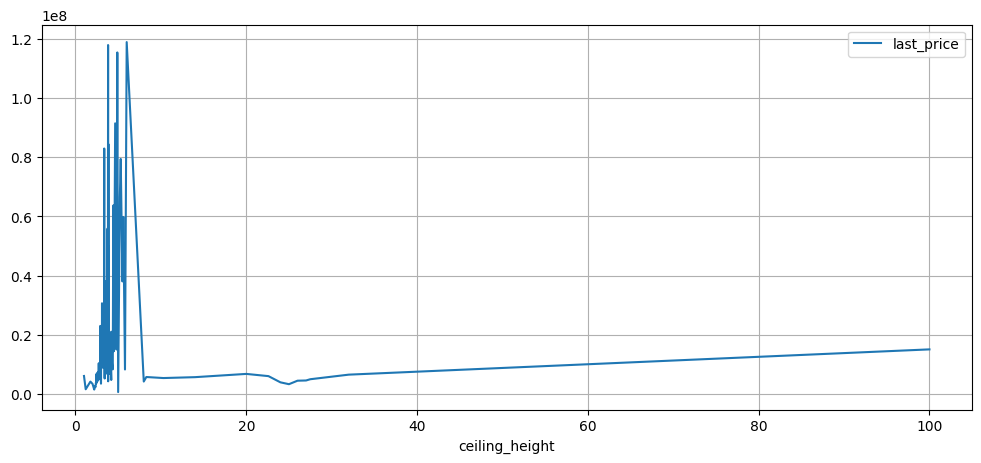

In [ ]:
data_ceiling_height.pivot_table(index='ceiling_height', values='last_price').plot(grid=True, figsize=(12, 5))

<font color='green'>     
    Уберём "хвост" в распределении. Значения выше 20 принадлежат одному ценовому диапазону, поэтому скорее всего пропущена точка и значения нужно разделить на 10. Выполним эту операцию.<br>
</font>

In [ ]:
data_ceiling_height['ceiling_height'] = (
    data_ceiling_height['ceiling_height']
        .where(data_ceiling_height['ceiling_height'] < 20,
               data_ceiling_height['ceiling_height']/10))

<Axes: xlabel='ceiling_height'>

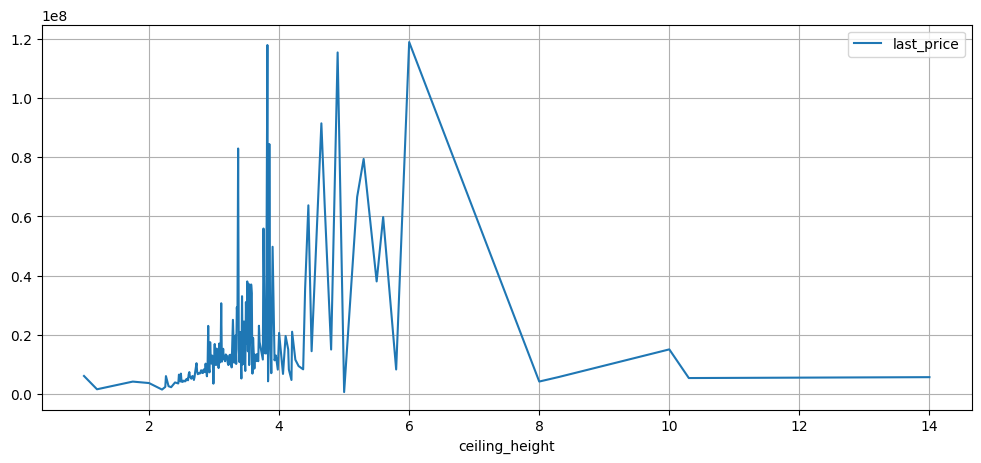

In [ ]:
data_ceiling_height.pivot_table(index='ceiling_height', values='last_price').plot(grid=True, figsize=(12, 5))

<font color='green'>     
    Удалим значения меньше двух метров и больше пяти. Вычислим процент удалённых значений<br>
</font>

In [ ]:
data_ceiling_height = data_ceiling_height.query('2 < ceiling_height < 5')
data_ceiling_height['ceiling_height'].count()

14474

<font color='green'>     
    Удалили 14504 - 14474 = 30. Удалили 0,2% данных. Приемлемо для дальнейшего анализа.<br>
</font>

<Axes: xlabel='ceiling_height'>

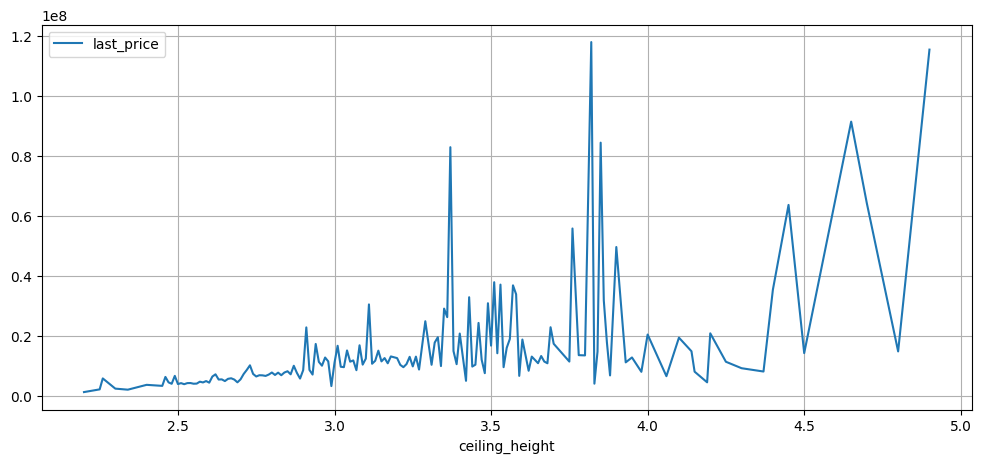

In [ ]:
data_ceiling_height.pivot_table(index='ceiling_height', values='last_price').plot(grid=True, figsize=(12, 5))

### Замена пропусков в столбце "Всего этажей в доме"

<font color='green'>    
    Всего этажей в доме (floors_total). Пропусков 23699 - 23613 = 86 (0,4%). <br>
</font>

<font color='green'>     
    Заменим пропуски в этом столбце на (-1). Таких значений нет, поэтому информация не потеряется. Тем более данные о этажности квартир полноценны.<br>
</font>

In [ ]:
data_new = data[data.columns].copy()
data_new['floors_total'] = data['floors_total'].fillna(value='-1.0').astype (float)
len(data_new[data_new['floors_total'].isna()])

0

<font color='green'>    
    Также заменим в столбце 'floor' тип данных на float, так как это понадобится при исследовании данных<br>
</font>

In [ ]:
data_new['floor']=data_new['floor'].astype(float)

<br>Ещё пропуски в столбце floors_total можно заменить на этаж квартиры или вообще удалить, так как пропусков меньше 1%
</div>

### Замена пропусков в столбце "Жилая площадь в квадратных метрах (м²))"
<font color='green'>    
    Жилая площадь в квадратных метрах (м²) (living_area). Пропусков 23699 - 21796 = 1903 (8%). Данные в этих строках можно заменить, на число равное общей площади умноженной на средний процент отношения этих площадей. Все изменённые данные будем хранить в таблице data_new<br>
</font>

In [ ]:
data_new['procent_area'] = data['living_area']/data['total_area']
data_new['procent_area'].describe()

count    21796.000000
mean         0.564766
std          0.105368
min          0.021583
25%          0.495177
50%          0.567860
75%          0.637880
max          1.000000
Name: procent_area, dtype: float64

<font color='green'> Из этих данных видно, что существуют квартиры у которых жилая площадь может составлять 2% от общей площади. К этим данным нужно приглядеться на этапе анализа. Заменим пропущенные данные, и посмотрим, как изменились зависимости....</font>

In [ ]:
data_new['living_area'] = data['living_area'].fillna(value=data['total_area']*0.564766).astype (float)
len(data_new[data_new['living_area'].isna()])

0

<font color='green'> Проверим изменение корреляции данных "Жилой площади в квадратных метрах (м²))" с ценой, общей площадью и количеством комнат</font>

In [ ]:
data['living_area'].corr(data['last_price']), data['living_area'].corr(data['total_area']), data['living_area'].corr(data['rooms'])

(0.5664915336952648, 0.9395373338721491, 0.8459774567888746)

In [ ]:
data_new['living_area'].corr(data['last_price']), data_new['living_area'].corr(data['total_area']), data_new['living_area'].corr(data['rooms'])

(0.5856579337320967, 0.9458598767828411, 0.82760586519572)

<font color='green'> Корреляция улучшилась, значит добавленные данные имеют лучший показатель корреляции</font>

### Замена пропусков в столбце "Апартаменты (булев тип)"
<font color='green'>    
    Апартаменты (булев тип) (is_apartment). Пропусков 23699 - 2775 = 20924 (88%). При том что 50 квартир из списка являются аппартаментами, 2725 - не являются аппаратаментами. Остальные данные - формат nan. Заменим значения на "0.0" и "1.0", а также заменим пропуски на "0.0".<br>
</font>

In [ ]:
data.groupby('is_apartment')['is_apartment'].count()

is_apartment
False    2725
True       50
Name: is_apartment, dtype: int64

In [ ]:
data_new['is_apartment'] = data['is_apartment'].astype(float)
data_new['is_apartment'] = data_new['is_apartment'].fillna(value=0)

In [ ]:
data_new.groupby('is_apartment')['is_apartment'].count()

is_apartment
0.0    23649
1.0       50
Name: is_apartment, dtype: int64

<Axes: xlabel='is_apartment', ylabel='last_price'>

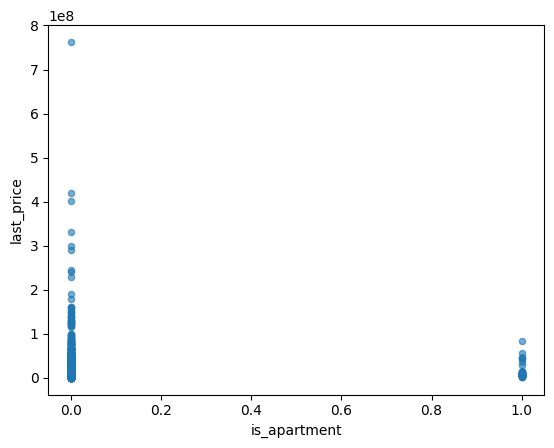

In [ ]:
data_new.plot(x='is_apartment', y='last_price', kind='scatter', alpha=0.6)

### Замена пропусков в столбце "Площадь кухни в квадратных метрах (м²)"
<font color='green'>    
    Площадь кухни в квадратных метрах (м²) (kitchen_area). Пропусков 23699 - 21421 = 2278 (10%). Проверим наличие корреляции. Заменим пропуски средними значениями, проконтролируем, чтобы корреляция не стала сильно больше.<br>
</font>

In [ ]:
data['kitchen_area'].corr(data['last_price'])

0.5198690130216387

In [ ]:
data_new['procent_kitchen_area'] = data['kitchen_area']/data['total_area']
data_new['procent_kitchen_area'].describe()

count    21421.000000
mean         0.187355
std          0.072968
min          0.025381
25%          0.133333
50%          0.172414
75%          0.232416
max          0.787879
Name: procent_kitchen_area, dtype: float64

In [ ]:
data_new['kitchen_area'] = data['kitchen_area'].fillna(value=data['total_area']*0.172414).astype (float)
len(data_new[data_new['kitchen_area'].isna()])

0

In [ ]:
data_new['kitchen_area'].corr(data['last_price'])

0.5134761017692968

### Замена пропусков в столбце "Число балконов"
<font color='green'>    
    6) Число балконов (balcony). Если продавец не указал число балконов, то, скорее всего, в его квартире их нет. Такие пропуски можно заменить на число 0. Методом isna() найдём все строки с пропусками в столбце balcony и посчитаем их, чтобы исключить другие неожиданности. Их должно быть 23699 - 12180 = 11519 (49%) <br>
</font>

In [ ]:
len(data[data['balcony'].isna()])

11519

<font color='green'>    
    Заменим в data_new['balcony'] пропущенные значения и проверим <br>
</font>

In [ ]:
data_new['balcony'] = data['balcony'].fillna(value='0')
len(data_new[data_new['balcony'].isna()])

0

### Замена пропусков в столбце "Название населённого пункта"
<font color='green'>    
    Название населённого пункта (locality_name). Пропусков 23699 - 23650 = 49 (0,2%). Заменим пропуски на "Без названия".<br>
</font>

In [ ]:
data_new['locality_name'] = data['locality_name'].fillna(value="Без названия")
len(data_new[data_new['locality_name'].isna()])

0

### Поиск и устранение неявных дубликатов в столбце "Название населённого пункта"
<font color='green'>    
    Название населённого пункта (locality_name). <br>
    Найдем количество уникальных значений в стобце "Название населённого пункта" <br>
    Отсортируем названия по уникальным значениям, чтобы определить неявные дубликты.<br>
    Т.к. метод .unique() не поддерживает одновременную работу 'float' and 'str' заменим в исходной базе пропущенные значения аналогичным способом data_new <br>
</font>

In [ ]:
data['locality_name'] = data['locality_name'].fillna(value="Без названия")
data_new['locality_name'] = data_new['locality_name'].fillna(value="Без названия")
data_new.agg({'locality_name': 'nunique'}).reset_index()

index    0
0  locality_name  365

In [ ]:
sorted(data['locality_name'].unique())

['Без названия',
 'Бокситогорск',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Высоцк',
 'Гатчина',
 'Зеленогорск',
 'Ивангород',
 'Каменногорск',
 'Кингисепп',
 'Кириши',
 'Кировск',
 'Колпино',
 'Коммунар',
 'Красное Село',
 'Кронштадт',
 'Кудрово',
 'Лодейное Поле',
 'Ломоносов',
 'Луга',
 'Любань',
 'Мурино',
 'Никольское',
 'Новая Ладога',
 'Отрадное',
 'Павловск',
 'Петергоф',
 'Пикалёво',
 'Подпорожье',
 'Приморск',
 'Приозерск',
 'Пушкин',
 'Санкт-Петербург',
 'Светогорск',
 'Сертолово',
 'Сестрорецк',
 'Сланцы',
 'Сосновый Бор',
 'Сясьстрой',
 'Тихвин',
 'Тосно',
 'Шлиссельбург',
 'городской поселок Большая Ижора',
 'городской поселок Янино-1',
 'городской посёлок Будогощь',
 'городской посёлок Виллози',
 'городской посёлок Лесогорский',
 'городской посёлок Мга',
 'городской посёлок Назия',
 'городской посёлок Новоселье',
 'городской посёлок Павлово',
 'городской посёлок Рощино',
 'городской посёлок Свирьстрой',
 'городской посёлок Советский',
 'городской посёлок Фёдоро

<font color='green'>    
    Заменим букву "ё" на е, это позволит заменить неявные дубликаты по написанию. А также заменим "поселок городского типа Рябово" на поселок "Рябово" <br>
</font>

In [ ]:
data_new['locality_name'] = (
    data_new['locality_name']
    .str.replace('ё', 'е')
    .replace(['поселок городского типа Рябово'], 'поселок Рябово', regex=True)
)

In [ ]:
data_new.agg({'locality_name': 'nunique'}).reset_index()

index    0
0  locality_name  330

<font color='green'>    
    Было 365 уникальных значения (с учётом - "без названия"), стало 330.<br>
</font>

### Замена пропусков в столбце "Расстояние до ближайшего аэропорта в метрах (м)"
<font color='green'>    
    Расстояние до ближайшего аэропорта в метрах (м) (airports_nearest). Пропусков 23699 - 18157 = 5542 (23%). Проверим корреляцию данных - расстояния до аэропорта и цены квартиры. И построим диаграмму, чтобы посмотреть динамику данных, для того чтобы подобрать корректную замену пропускам.<br>
</font>

In [ ]:
data_new['airports_nearest'].corr(data_new['last_price'])

-0.02623851683388874

<Axes: xlabel='airports_nearest', ylabel='last_price'>

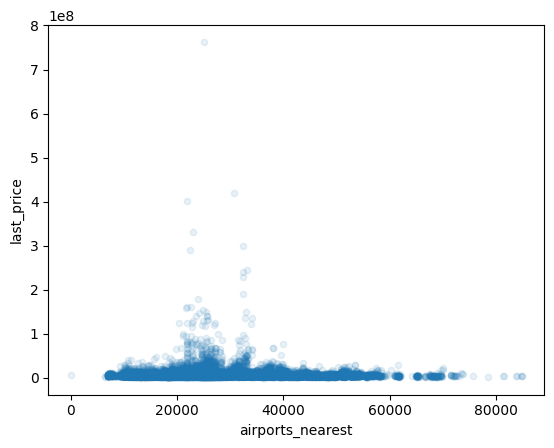

In [ ]:
data_new.plot(x='airports_nearest', y='last_price', kind='scatter', alpha=0.1)

<font color='green'>  
    Наблюдается слабая отрицательная корреляция. Чем дальше от аэропорта тем дешевле. Логично, но не принципиально. <br>
    Таким образом подойдёт замена на значения, являющиеся средними для данного населённого пункта. Сгруппируем данные по наименованиям населённых пунктов и найдем их среднее значение. Заменим пропущенные значения на соответствующие средние значения.
</font>

In [ ]:
data_new.groupby('locality_name')['airports_nearest'].mean().sort_values(ascending=False).head(30)

locality_name
поселок Молодежное         84430.200000
Зеленогорск                73300.250000
Кронштадт                  67469.263158
поселок Репино             62293.250000
поселок Щеглово            61908.000000
поселок Белоостров         57769.000000
Сестрорецк                 56640.486339
поселок Лисий Нос          55302.333333
поселок Песочный           54565.500000
поселок Парголово          53994.926606
поселок Левашово           52693.000000
поселок Мурино             51553.000000
Ломоносов                  48308.280303
Петергоф                   40184.676617
поселок Саперный           34142.666667
поселок Понтонный          30581.400000
поселок Стрельна           28148.363636
Санкт-Петербург            28046.186237
Красное Село               26595.579545
поселок Усть-Ижора         26510.500000
Колпино                    26375.863501
поселок Металлострой       25726.484848
Без названия               24572.341463
Павловск                   21053.342105
поселок Петро-Славянка    

<font color='green'>  
    Наблюдается малое количество населённых пунктов "знающих" расстояние до аэропорта (28)  и остальные, которые совсем "не знают" это расстояние (сколько бы квартир в них не было). Проверим отсутствие Nan в группах знающих расстояние.<br>
</font>

In [ ]:
data.groupby('locality_name')['airports_nearest'].count().sum()

18157

<font color='green'>  
    18157 значений расстояния до аэропорта в 28 населённых пунктах. В остальных его нет. Таким образом заменить на средние значения мы не сможем. Можем заменить на точные значения найденные на картах, но это слишком долго и в рамках данного исследования неактуально. Заменим пропущенные значения на средние в столбце data_new['airports_nearest'] и проконтролируем корреляцию.
</font>

In [ ]:
data['airports_nearest'].describe()

count    18157.000000
mean     28793.672193
std      12630.880622
min          0.000000
25%      18585.000000
50%      26726.000000
75%      37273.000000
max      84869.000000
Name: airports_nearest, dtype: float64

In [ ]:
# data_new['airports_nearest'] = data['airports_nearest'].fillna(value=28793.672193).astype (float)
# len(data_new[data_new['airports_nearest'].isna()])

data_airports_nearest = data.dropna(subset=['airports_nearest'])
len(data_airports_nearest[data_airports_nearest['airports_nearest'].isna()])

0

<font color='green'>  
    В целях соблюдения корректности выводов при дальнейшем анализе, пропуски лучше удалить.
</font>

<div class="alert alert-info">
<b>Создадим новую таблицу, которую можно использовать для анализа  данных, влияющих на цену недвижимости по дальности до аэропорта data_airports_nearest, в которой удалим пропуски. Она нам понадобится на этапе анализа данных. Основную таблицу с изменёнными данными data_new - оставим с полным набором строк. </b>
</div>

### Замена или удаление пропусков в столбце "Расстояние до центра города (м)"
<font color='green'>    
    Расстояние до центра города (м) (cityCenters_nearest). Пропусков 23699 - 18180 = 5519 (23%).<br>
    Посчитаем в скольки населённых пунктах есть значения - расстояние до центра города .<br>
</font>

In [ ]:
data_new.groupby('locality_name')['cityCenters_nearest'].mean().sort_values(ascending=False).head(30)

locality_name
поселок Молодежное         65529.200000
Зеленогорск                54617.583333
Ломоносов                  50739.969697
Кронштадт                  49195.726316
поселок Репино             43392.250000
поселок Белоостров         38868.000000
поселок Саперный           35854.666667
Петергоф                   35468.925373
Сестрорецк                 34624.480874
поселок Щеглово            34085.000000
Павловск                   33206.921053
поселок Понтонный          32293.450000
Колпино                    32113.771513
Красное Село               30020.284091
Пушкин                     28745.375000
поселок Усть-Ижора         28222.500000
поселок Лисий Нос          27613.333333
поселок Металлострой       27561.348485
поселок Александровская    27468.000000
поселок Петро-Славянка     27165.000000
поселок Песочный           26475.250000
поселок Левашово           25727.000000
поселок Шушары             24243.387615
поселок Стрельна           23376.113636
поселок Мурино            

In [ ]:
data_new.groupby('locality_name')['cityCenters_nearest'].count().sum()

18180

<font color='green'>    
   Для анализа зависимостей других параметров от расстояния до центра города, создадим новую таблицу, в которой удалим строки с пропусками.
</font>

In [ ]:
data_cityCenters_nearest = data_new[data.columns].copy()
data_cityCenters_nearest = data_cityCenters_nearest.dropna(subset=['cityCenters_nearest'])
data_cityCenters_nearest.groupby('locality_name')['cityCenters_nearest'].count().sum()

18180

### Замена или удаление пропусков в столбце "Число парков в радиусе 3 км"
   <font color='green'>    
    Число парков в радиусе 3 км (parks_around3000). Пропусков 23699 - 18181 = 5518 (23%). Удалим пропуски.<br>
</font>

In [ ]:
data['parks_around3000'].describe()

count    18181.000000
mean         0.611408
std          0.802074
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: parks_around3000, dtype: float64

In [ ]:
data['parks_around3000'].corr(data['last_price'])

0.1510583396607796

<font color='green'>     
    Посмотрим как зависит цена от количества парков находящихся в радиусе 3 км<br>
    Для этого удалим пропущенные значения, сгруппируем оставшиеся и определим медианную цену, так как в таблице есть объекты с сильными отклоненениями в цене.<br>
</font>

In [ ]:
data_parks = data[data.columns].copy()
data_parks = data_parks.dropna(subset=['parks_around3000'])
data_parks_around3000 = data_parks.pivot_table(index='parks_around3000', values='last_price', aggfunc=['median', 'count'])
data_parks_around3000.columns = ['last_price', 'count']
data_parks_around3000.sort_values(by='count', ascending=False).head()

last_price  count
parks_around3000                   
0.0                4900000.0  10106
1.0                5650000.0   5681
2.0                6200000.0   1747
3.0                7867616.0    647

<font color='green'>     
    Наблюдается явная зависимость цены от количества парков в округе. Застройщики не дремлют.<br>
    Посмотрим процент корреляции.<br>
</font>

In [ ]:
data_parks['parks_around3000'].corr(data_parks['last_price'])

0.1510583396607796

### Замена или удаление пропусков в столбце "Расстояние до ближайшего парка (м)"
<font color='green'>    
    Расстояние до ближайшего парка (м) (parks_nearest). Пропусков 23699 - 8079 = 15620 (66%). Удалим пропуски.<br>
</font>

In [ ]:
data_parks = data_parks.dropna(subset=['parks_nearest'])
data_parks['parks_nearest'].describe()

count    8079.000000
mean      490.804555
std       342.317995
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

<font color='green'>    
    Пропуски в данных уже удалены<br>
</font>

### Замена пропусков в столбце "Число водоёмов в радиусе 3 км"
<font color='green'>    
    Число водоёмов в радиусе 3 км (ponds_around3000). Пропусков 23699 - 18181 = 15620 (23%). Удалим пропуски.<br>
</font>

In [ ]:
data['ponds_around3000'].describe()

count    18181.000000
mean         0.770255
std          0.938346
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          3.000000
Name: ponds_around3000, dtype: float64

In [ ]:
data['ponds_around3000'].corr(data['last_price'])

0.15999566555083725

<font color='green'>     
    Посмотрим как зависит цена от количества водоёмов находящихся в радиусе 3 км<br>
    Для этого удалим пропущенные значения, сгруппируем оставшиеся и определим медианную цену, так как в таблице есть объекты с сильными отклоненениями в цене.<br>
</font>

In [ ]:
data_ponds = data[data.columns].copy()
data_ponds = data_ponds.dropna(subset=['ponds_around3000'])
data_ponds_around3000 = data_ponds.pivot_table(index='ponds_around3000', values='last_price', aggfunc=['median', 'count']).reset_index()
data_ponds_around3000.columns = ['ponds_around3000','last_price', 'count']
data_ponds_around3000.sort_values(by='count', ascending=False).head()

ponds_around3000  last_price  count
0               0.0   4990000.0   9071
1               1.0   5240000.0   5717
2               2.0   5969322.0   1892
3               3.0   8137395.0   1501

<font color='green'>     
    Наблюдается явная зависимость цены от количества водоёмов в округе.<br>
    Посмотрим сохранность процента корреляции.<br>
</font>

In [ ]:
data_ponds['ponds_around3000'].corr(data_ponds['last_price'])

0.15999566555083725

### Замена пропусков в столбце "Расстояние до ближайшего водоёма (м)"
<font color='green'>    
    Расстояние до ближайшего водоёма (м) (ponds_nearest). Пропусков 23699 - 9110 = 14589 (62%). Заменим пропуски на "0".<br>
</font>

In [ ]:
data_ponds = data_ponds.dropna(subset=['ponds_nearest'])
data_ponds['ponds_nearest'].describe()

count    9110.000000
mean      517.980900
std       277.720643
min        13.000000
25%       294.000000
50%       502.000000
75%       729.000000
max      1344.000000
Name: ponds_nearest, dtype: float64

<font color='green'>    
    Пропуски в данных уже удалены<br>
</font>

<Axes: >

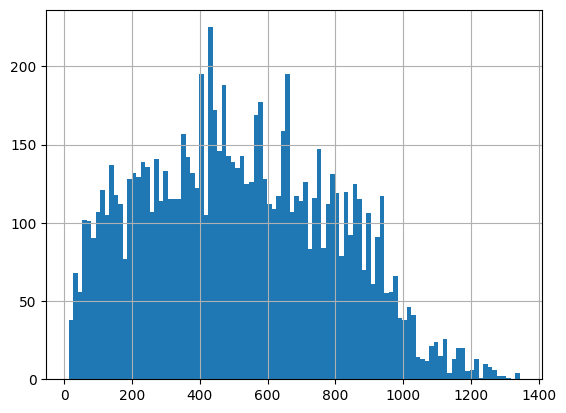

In [ ]:
data_ponds['ponds_nearest'].hist(bins=100)

In [ ]:
def ponds_nearest(nearest2):

    if 0 < nearest2 <= 294.000000:
        return '25% - до 294 метров'
    if 294.000000 < nearest2 <= 502.000000:
        return '50% - до 502 метров'
    if 502.000000 < nearest2 <= 729.000000:
        return '75% - до 729 метров'
    return 'дальше 729 метров'
data_ponds['nearest_group'] = data_ponds['ponds_nearest'].apply(ponds_nearest)
data_ponds.groupby('nearest_group')['nearest_group'].count()

nearest_group
25% - до 294 метров    2284
50% - до 502 метров    2273
75% - до 729 метров    2276
дальше 729 метров      2277
Name: nearest_group, dtype: int64

In [ ]:
data_ponds2 = data_ponds.pivot_table(index='nearest_group', values='last_price', aggfunc=['mean', 'median', 'count'])
data_ponds2.columns = ['last_price_mean','last_price_median', 'count']
data_ponds2.sort_values(by='last_price_mean', ascending=False).head(10)

last_price_mean  last_price_median  count
nearest_group                                                 
25% - до 294 метров     1.106127e+07          6300000.0   2284
50% - до 502 метров     8.779080e+06          5600000.0   2273
75% - до 729 метров     7.853455e+06          5448037.5   2276
дальше 729 метров       7.389918e+06          5490000.0   2277

In [ ]:
data_ponds['parks_nearest'].corr(data_ponds['last_price'])

-0.010511702135010674

<font color='green'>    
    Наблюдается слабая отрицательная корреляция, ближе к водоёму - дороже.<br>
</font>

### Замена пропусков в столбце "Сколько дней было размещено объявление (от публикации до снятия)"
<font color='green'>    
    Сколько дней было размещено объявление (от публикации до снятия) (days_exposition). Пропусков 23699 - 20518 = 3181 (13%).<br>
</font>

<font color='green'>    
    Удалим все пропуски во вспомогательной таблице. Чтобы далее было возмможно точно посчитать среднее и медианное значение. Так как если бы мы заменили пропуски на 0, то это оказало бы сильное влияние в сторону уменьшения значений. Рассмотрим подробнее в пункте 4.11.1
</font>

In [ ]:
data_support_days = data[data.columns].copy()

<font color='green'>    
    Добавим столбец - года публикации
</font>

In [ ]:
data_support_days['first_day_exposition']

0        2019-03-07T00:00:00
1        2018-12-04T00:00:00
2        2015-08-20T00:00:00
3        2015-07-24T00:00:00
4        2018-06-19T00:00:00
                ...         
23694    2017-03-21T00:00:00
23695    2018-01-15T00:00:00
23696    2018-02-11T00:00:00
23697    2017-03-28T00:00:00
23698    2017-07-21T00:00:00
Name: first_day_exposition, Length: 23699, dtype: object

In [ ]:
data_support_days['date/time'] = pd.to_datetime(data_support_days['first_day_exposition'])  # format = '%Y/%m/%dT%H:%M:%S'
data_support_days['year_publication'] = data_support_days['date/time'].dt.year

In [ ]:
data_support_days = data_support_days.dropna(subset=['days_exposition'])
data_support_days['days_exposition'].count()

20518

In [ ]:
len(data_support_days[data_support_days['days_exposition'].isna()])

0

In [ ]:
data_support_days.groupby('year_publication')['days_exposition'].describe()

count        mean         std    min    25%    50%  \
year_publication                                                        
2014               119.0  910.983193  296.115414  554.0  607.5  875.0   
2015              1121.0  648.035682  318.759788  182.0  389.0  576.0   
2016              2716.0  320.748159  256.819800    3.0  114.0  235.0   
2017              7919.0  158.955929  153.232558    3.0   45.0  103.0   
2018              7560.0   94.337963   85.171023    3.0   34.0   64.0   
2019              1083.0   30.931671   23.828503    1.0   12.0   23.0   

                      75%     max  
year_publication                   
2014              1120.00  1580.0  
2015               881.00  1512.0  
2016               475.25  1153.0  
2017               227.00   825.0  
2018               131.00   465.0  
2019                45.00   110.0

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b>
<br>Отличная работа! Не забывай, что не всегда стоит делать замену, ради замены. Очень важно обоснование. Иногда пропуски можно удалить (если их мало), либо вообще не трогать, если у нас нет возможности подобрать аргументированный способ замены
</div>

## Посчитайте и добавьте в таблицу новые столбцы

Добавить или удалить столбцы
<font color='green'>    
    ·	цена одного квадратного метра (нужно поделить стоимость объекта на его общую площадь, а затем округлить до двух знаков после запятой);<br>
·	день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);<br>
·	месяц публикации объявления;<br>
·	год публикации объявления;<br>
·	тип этажа квартиры (значения — «‎первый», «последний», «другой»);<br>
·	расстояние до центра города в километрах (переведите из м в км и округлите до ближайших целых значений).<br>

</font>

### Добавим столбец - Цена одного квадратного метра" - 'price_m2'
<font color='green'>    
    Посчитаем значение и добавим столбец - "Цена одного квадратного метра" -  price_m2<br>
   (Поделим стоимость объекта на его общую площадь, а затем округлим до двух знаков после запятой)<br>
</font>


In [ ]:
import numpy as np
data_new['price_m2'] = data['last_price']/data['total_area']
data_new['price_m2'] = np.round(data_new['price_m2'], decimals = 2)
data_new.head()

total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0  2019-03-07T00:00:00      3   
1             7   3350000.0        40.4  2018-12-04T00:00:00      1   
2            10   5196000.0        56.0  2015-08-20T00:00:00      2   
3             0  64900000.0       159.0  2015-07-24T00:00:00      3   
4             2  10000000.0       100.0  2018-06-19T00:00:00      2   

   ceiling_height  floors_total  living_area  floor  is_apartment  studio  \
0            2.70          16.0    51.000000    8.0           0.0   False   
1             NaN          11.0    18.600000    1.0           0.0   False   
2             NaN           5.0    34.300000    4.0           0.0   False   
3             NaN          14.0    89.797794    9.0           0.0   False   
4            3.03          14.0    32.000000   13.0           0.0   False   

   open_plan  kitchen_area balcony    locality_name  airports_nearest  \
0      False     25.000000       0  Санкт-Петербург           18863.0   
1      False     11.000000     2.0   поселок Шушары           12817.0   
2      False      8.300000     0.0  Санкт-Петербург           21741.0   
3      False     27.413826     0.0  Санкт-Петербург           28098.0   
4      False     41.000000       0  Санкт-Петербург           31856.0   

   cityCenters_nearest  parks_around3000  parks_nearest  ponds_around3000  \
0              16028.0               1.0          482.0               2.0   
1              18603.0               0.0            NaN               0.0   
2              13933.0               1.0           90.0               2.0   
3               6800.0               2.0           84.0               3.0   
4               8098.0               2.0          112.0               1.0   

   ponds_nearest  days_exposition  procent_area  procent_kitchen_area  \
0          755.0              NaN      0.472222              0.231481   
1            NaN             81.0      0.460396              0.272277   
2          574.0            558.0      0.612500              0.148214   
3          234.0            424.0           NaN                   NaN   
4           48.0            121.0      0.320000              0.410000   

    price_m2  
0  120370.37  
1   82920.79  
2   92785.71  
3  408176.10  
4  100000.00

### Добавим столбец -  День недели публикации объявления - day_week_publication
<font color='green'>    
    Добавим столбец - день недели публикации объявления (0 — понедельник, 1 — вторник и так далее)<br>
    Для этого используем исходные данные:<br>
    · first_day_exposition — дата публикации<br>
</font>


In [ ]:
data_new['date/time'] = pd.to_datetime(data['first_day_exposition']) # format = '%Y/%m/%dT%H:%M:%S'
data_new['day_week_publication'] = data_new['date/time'].dt.weekday
print(data_new.head())

   total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0  2019-03-07T00:00:00      3   
1             7   3350000.0        40.4  2018-12-04T00:00:00      1   
2            10   5196000.0        56.0  2015-08-20T00:00:00      2   
3             0  64900000.0       159.0  2015-07-24T00:00:00      3   
4             2  10000000.0       100.0  2018-06-19T00:00:00      2   

   ceiling_height  floors_total  living_area  floor  is_apartment  studio  \
0            2.70          16.0    51.000000    8.0           0.0   False   
1             NaN          11.0    18.600000    1.0           0.0   False   
2             NaN           5.0    34.300000    4.0           0.0   False   
3             NaN          14.0    89.797794    9.0           0.0   False   
4            3.03          14.0    32.000000   13.0           0.0   False   

   open_plan  kitchen_area balcony    locality_name  airports_nearest  \
0      False     25.000000       0  С

### 	Добавим столбец -  Месяц публикации объявления - 'month_publication'


In [ ]:
data_new['month_publication'] = data_new['date/time'].dt.month
data_new.head()

total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0  2019-03-07T00:00:00      3   
1             7   3350000.0        40.4  2018-12-04T00:00:00      1   
2            10   5196000.0        56.0  2015-08-20T00:00:00      2   
3             0  64900000.0       159.0  2015-07-24T00:00:00      3   
4             2  10000000.0       100.0  2018-06-19T00:00:00      2   

   ceiling_height  floors_total  living_area  floor  is_apartment  studio  \
0            2.70          16.0    51.000000    8.0           0.0   False   
1             NaN          11.0    18.600000    1.0           0.0   False   
2             NaN           5.0    34.300000    4.0           0.0   False   
3             NaN          14.0    89.797794    9.0           0.0   False   
4            3.03          14.0    32.000000   13.0           0.0   False   

   open_plan  kitchen_area balcony    locality_name  airports_nearest  \
0      False     25.000000       0  Санкт-Петербург           18863.0   
1      False     11.000000     2.0   поселок Шушары           12817.0   
2      False      8.300000     0.0  Санкт-Петербург           21741.0   
3      False     27.413826     0.0  Санкт-Петербург           28098.0   
4      False     41.000000       0  Санкт-Петербург           31856.0   

   cityCenters_nearest  parks_around3000  parks_nearest  ponds_around3000  \
0              16028.0               1.0          482.0               2.0   
1              18603.0               0.0            NaN               0.0   
2              13933.0               1.0           90.0               2.0   
3               6800.0               2.0           84.0               3.0   
4               8098.0               2.0          112.0               1.0   

   ponds_nearest  days_exposition  procent_area  procent_kitchen_area  \
0          755.0              NaN      0.472222              0.231481   
1            NaN             81.0      0.460396              0.272277   
2          574.0            558.0      0.612500              0.148214   
3          234.0            424.0           NaN                   NaN   
4           48.0            121.0      0.320000              0.410000   

    price_m2  date/time  day_week_publication  month_publication  
0  120370.37 2019-03-07                     3                  3  
1   82920.79 2018-12-04                     1                 12  
2   92785.71 2015-08-20                     3                  8  
3  408176.10 2015-07-24                     4                  7  
4  100000.00 2018-06-19                     1                  6

###	Добавим столбец -  Год публикации объявления - 'year_publication'

In [ ]:
data_new['year_publication'] = data_new['date/time'].dt.year
data_new.head()

total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0  2019-03-07T00:00:00      3   
1             7   3350000.0        40.4  2018-12-04T00:00:00      1   
2            10   5196000.0        56.0  2015-08-20T00:00:00      2   
3             0  64900000.0       159.0  2015-07-24T00:00:00      3   
4             2  10000000.0       100.0  2018-06-19T00:00:00      2   

   ceiling_height  floors_total  living_area  floor  is_apartment  studio  \
0            2.70          16.0    51.000000    8.0           0.0   False   
1             NaN          11.0    18.600000    1.0           0.0   False   
2             NaN           5.0    34.300000    4.0           0.0   False   
3             NaN          14.0    89.797794    9.0           0.0   False   
4            3.03          14.0    32.000000   13.0           0.0   False   

   open_plan  kitchen_area balcony    locality_name  airports_nearest  \
0      False     25.000000       0  Санкт-Петербург           18863.0   
1      False     11.000000     2.0   поселок Шушары           12817.0   
2      False      8.300000     0.0  Санкт-Петербург           21741.0   
3      False     27.413826     0.0  Санкт-Петербург           28098.0   
4      False     41.000000       0  Санкт-Петербург           31856.0   

   cityCenters_nearest  parks_around3000  parks_nearest  ponds_around3000  \
0              16028.0               1.0          482.0               2.0   
1              18603.0               0.0            NaN               0.0   
2              13933.0               1.0           90.0               2.0   
3               6800.0               2.0           84.0               3.0   
4               8098.0               2.0          112.0               1.0   

   ponds_nearest  days_exposition  procent_area  procent_kitchen_area  \
0          755.0              NaN      0.472222              0.231481   
1            NaN             81.0      0.460396              0.272277   
2          574.0            558.0      0.612500              0.148214   
3          234.0            424.0           NaN                   NaN   
4           48.0            121.0      0.320000              0.410000   

    price_m2  date/time  day_week_publication  month_publication  \
0  120370.37 2019-03-07                     3                  3   
1   82920.79 2018-12-04                     1                 12   
2   92785.71 2015-08-20                     3                  8   
3  408176.10 2015-07-24                     4                  7   
4  100000.00 2018-06-19                     1                  6   

   year_publication  
0              2019  
1              2018  
2              2015  
3              2015  
4              2018

### Добавим столбец -  Тип этажа квартиры - floors_group
<font color='green'>    
    Добавим столбец - тип этажа квартиры: (значения — «первый», «последний», «другой»)<br>
    Для этого используем исходные данные:<br>
    floors_total - всего этажей в доме<br>
    floor - этаж квартиры<br>
    Заменим значения в столбце floor на 0, у которых значение равно 1.<br>
    Добавим столбец в котором разместим результат деления floor/floors_total. Далее сделаем замену на «последний», если результат будет равен 1, «другой», если не равен 1 и больше 0. "Не известно" - если результат inf. "Первый" если =0. <br>
    Посмотрим как распределено жилье по этажам.<br>
</font>

In [ ]:
data_new.groupby('floors_total')['floors_total'].count()

floors_total
-1.0       86
 1.0       25
 2.0      383
 3.0      668
 4.0     1200
 5.0     5788
 6.0      914
 7.0      592
 8.0      390
 9.0     3761
 10.0    1174
 11.0     203
 12.0    1362
 13.0     229
 14.0     553
 15.0     365
 16.0    1376
 17.0     833
 18.0     505
 19.0     339
 20.0     271
 21.0     158
 22.0     286
 23.0     352
 24.0     469
 25.0    1075
 26.0     124
 27.0     164
 28.0      21
 29.0       1
 33.0       1
 34.0       1
 35.0      24
 36.0       3
 37.0       1
 52.0       1
 60.0       1
Name: floors_total, dtype: int64

<font color='green'>    
    Первый этаж по "инострански" будет нулевым :)
</font>

In [ ]:
data_new['floor'] = data['floor'].replace(1, 0)

In [ ]:
data_new.groupby('floor')['floor'].count()

floor
0     2917
2     3368
3     3073
4     2804
5     2621
6     1305
7     1218
8     1083
9     1051
10     687
11     523
12     526
13     379
14     337
15     343
16     315
17     227
18     178
19     147
20     110
21     125
22     113
23     100
24      63
25      46
26      24
27      10
28       1
29       1
30       1
31       1
32       1
33       1
Name: floor, dtype: int64

In [ ]:
data_new['floors_floor'] = data_new['floor']/data_new['floors_total']
data_new.groupby('floors_floor')['floors_floor'].count()

floors_floor
-24.000000       2
-23.000000       1
-22.000000       1
-21.000000       4
-20.000000       2
              ... 
 0.961538        6
 0.962963       14
 0.964286        1
 0.969697        1
 1.000000     3336
Name: floors_floor, Length: 267, dtype: int64

"""
    Возвращает категорию этажности по значению ratio, используя правила:
    - 'другой', если ratio != 1;
    - 'последний' если ratio == 1.
    """

In [ ]:
def floors_group(ratio):

    if 0 < ratio != 1:
        return 'другой'
    if ratio == 1:
        return 'последний'
    if ratio == 0:
        return 'первый этаж'
    return 'не известно'
data_new['floors_group'] = data_new['floors_floor'].apply(floors_group)
data_new.groupby('floors_group')['floors_group'].count()


floors_group
другой         17363
не известно       83
первый этаж     2917
последний       3336
Name: floors_group, dtype: int64

### Добавим столбец -  расстояние до центра города в километрах - Centers_km
<font color='green'>    
    Добавим столбец - расстояние до центра города в километрах: (переведём из м в км и округлим до ближайших целых значений).<br>
    Для этого используем исходные данные:<br>
    'cityCenters_nearest' — расстояние до центра города (м)<br>
</font>


In [ ]:
data_new['Centers_km'] = data['cityCenters_nearest']/1000
data_new['Centers_km'] = np.round(data_new['Centers_km'], decimals = 0)
data_new.head()

total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0  2019-03-07T00:00:00      3   
1             7   3350000.0        40.4  2018-12-04T00:00:00      1   
2            10   5196000.0        56.0  2015-08-20T00:00:00      2   
3             0  64900000.0       159.0  2015-07-24T00:00:00      3   
4             2  10000000.0       100.0  2018-06-19T00:00:00      2   

   ceiling_height  floors_total  living_area  floor  is_apartment  studio  \
0            2.70          16.0    51.000000      8           0.0   False   
1             NaN          11.0    18.600000      0           0.0   False   
2             NaN           5.0    34.300000      4           0.0   False   
3             NaN          14.0    89.797794      9           0.0   False   
4            3.03          14.0    32.000000     13           0.0   False   

   open_plan  kitchen_area balcony    locality_name  airports_nearest  \
0      False     25.000000       0  Санкт-Петербург           18863.0   
1      False     11.000000     2.0   поселок Шушары           12817.0   
2      False      8.300000     0.0  Санкт-Петербург           21741.0   
3      False     27.413826     0.0  Санкт-Петербург           28098.0   
4      False     41.000000       0  Санкт-Петербург           31856.0   

   cityCenters_nearest  parks_around3000  parks_nearest  ponds_around3000  \
0              16028.0               1.0          482.0               2.0   
1              18603.0               0.0            NaN               0.0   
2              13933.0               1.0           90.0               2.0   
3               6800.0               2.0           84.0               3.0   
4               8098.0               2.0          112.0               1.0   

   ponds_nearest  days_exposition  procent_area  procent_kitchen_area  \
0          755.0              NaN      0.472222              0.231481   
1            NaN             81.0      0.460396              0.272277   
2          574.0            558.0      0.612500              0.148214   
3          234.0            424.0           NaN                   NaN   
4           48.0            121.0      0.320000              0.410000   

    price_m2  date/time  day_week_publication  month_publication  \
0  120370.37 2019-03-07                     3                  3   
1   82920.79 2018-12-04                     1                 12   
2   92785.71 2015-08-20                     3                  8   
3  408176.10 2015-07-24                     4                  7   
4  100000.00 2018-06-19                     1                  6   

   year_publication  floors_floor floors_group  Centers_km  
0              2019      0.500000       другой        16.0  
1              2018      0.000000  первый этаж        19.0  
2              2015      0.800000       другой        14.0  
3              2015      0.642857       другой         7.0  
4              2018      0.928571       другой         8.0

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b>
<br>Все необходимые колонки добавлены. Идём дальше)
</div>

<font color='green'>    
   Добавим колонку 'Centers_km' также в базу data_cityCenters_nearest, в которой удалены пропуски.
</font>

In [ ]:
data_cityCenters_nearest['Centers_km'] = data_cityCenters_nearest['cityCenters_nearest']/1000
data_cityCenters_nearest['Centers_km'] = np.round(data_cityCenters_nearest['Centers_km'], decimals = 0)

## Проведите исследовательский анализ данных

<font color='green'>    
    Изучим перечисленные ниже параметры объектов и построим отдельные гистограммы для каждого из этих параметров. В некоторых параметрах встречаются редкие и выбивающиеся значения. При построении гистограмм удалим их или заменим, если природа искажений очевидна.<br>
    Список параметров:<br>
·	общая площадь total_area;<br>
·	жилая площадь living_area;<br>
·	площадь кухни kitchen_area;<br>
·	цена объекта last_price;<br>
·	количество комнат rooms;<br>
·	высота потолков ceiling_height;<br>
·	тип этажа квартиры («первый», «последний», «другой») floors_group;<br>
·	общее количество этажей в доме floors_total;<br>
·	расстояние до центра города в метрах cityCenters_nearest;<br>
·	расстояние до ближайшего парка parks_nearest.<br>
</font>

### Общая площадь - исследовательский анализ данных

<Axes: >

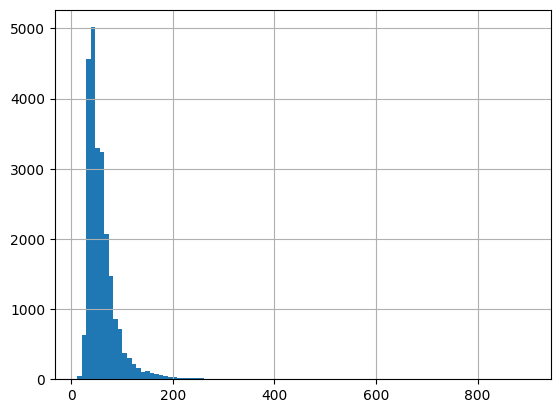

In [ ]:
data_new['total_area'].hist(bins=100)

In [ ]:
data_new['total_area_150'] = data['total_area'] > 150
(data_new['total_area_150'].mean())

0.02379847250938858

<font color='green'>    
    В результате среза данных будет потеряно 2,4% данных.
</font>

<Axes: xlabel='total_area'>

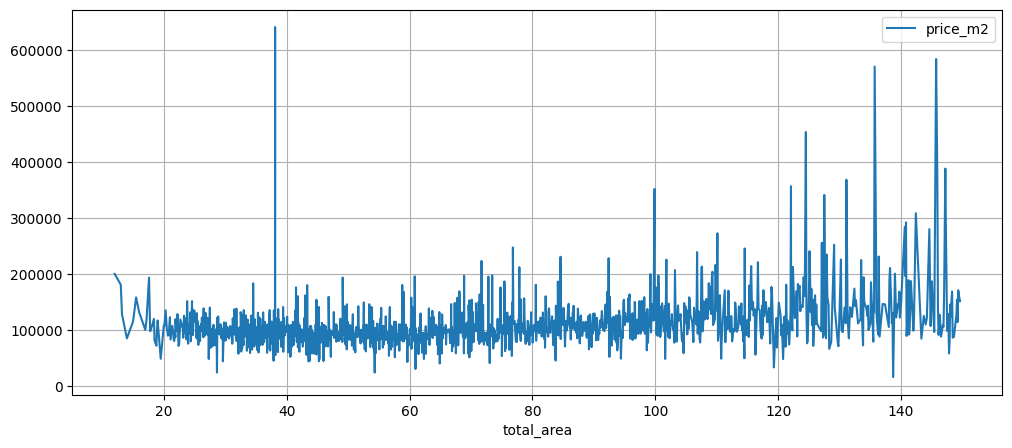

In [ ]:
data_150m = data_new.query('total_area < 150')
data_150m.pivot_table(index='total_area', values='price_m2').plot(grid=True, figsize=(12, 5))

<Axes: >

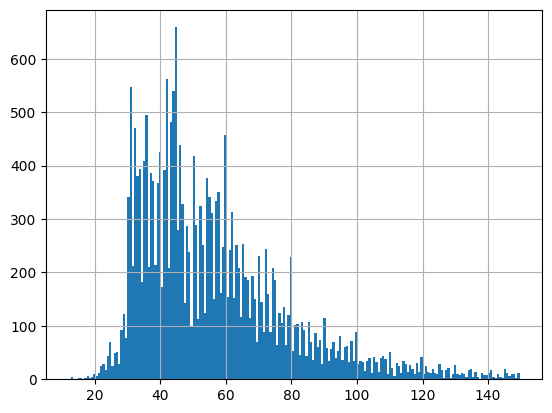

In [ ]:
data_150m['total_area'].hist(bins=200)

<font color='green'>    
    Наблюдается несколько пиков в распределении. В данной гистограмме собрано много гистограмм по типу жилья.
</font>

In [ ]:
data_150m['total_area'].corr(data_ponds['last_price'])

0.6853284119375957

<font color='green'>    
    Положительная корреляция цены квартиры и общей площади
</font>

### Жилая площадь - исследовательский анализ данных

<Axes: >

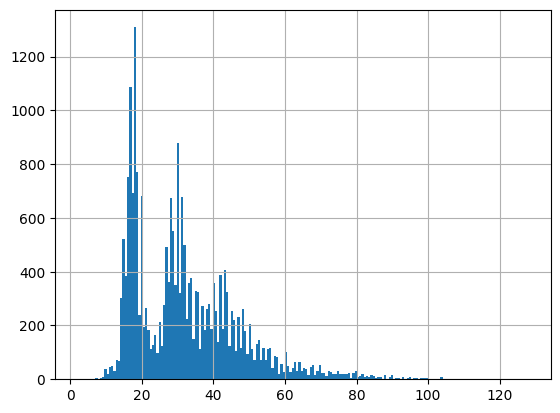

In [ ]:
data_150m['living_area'].hist(bins=200)

<font color='green'>    
    На графике наблюдается несколько пиков. Очевидно распределение по классам. Каких то квартир больше, каких-то меньше. Также есть пик по однотипным квартирам. Много одинаковых.
</font>

<Axes: xlabel='living_area', ylabel='price_m2'>

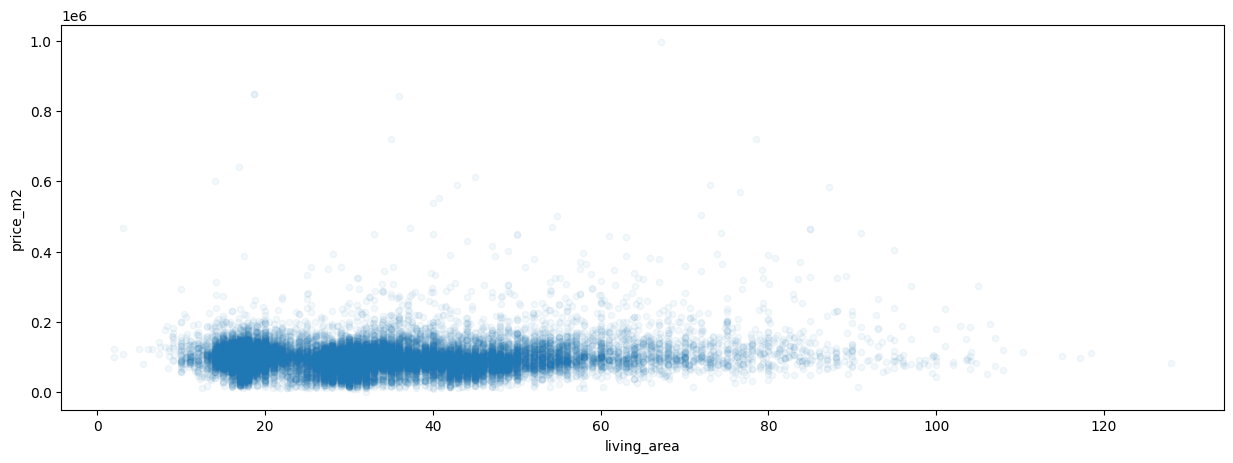

In [ ]:
data_150m.plot(x='living_area', y='price_m2', kind='scatter', alpha=0.05, figsize=(15, 5))

<font color='green'>    
    Наблюдается разброс цен на однотипные квартиры - ярко выраженные столбцы.
</font>

<font color='green'>    
    Изучим квартиры у которых жилая площадь составляет 2% от общей
</font>

In [ ]:
data_new['procent_area'].describe()

count    21796.000000
mean         0.564766
std          0.105368
min          0.021583
25%          0.495177
50%          0.567860
75%          0.637880
max          1.000000
Name: procent_area, dtype: float64

In [ ]:
data_new.query('procent_area < 0.1')

total_images  last_price  total_area first_day_exposition  rooms  \
3242              7   4440000.0        41.0  2017-07-02T00:00:00      1   
13915            20   6350000.0        52.0  2018-02-06T00:00:00      2   
21758             0   2330000.0        23.0  2018-01-01T00:00:00      0   
21943            15   6100000.0        77.6  2019-02-28T00:00:00      4   
23574            14  64990000.0       139.0  2015-11-24T00:00:00      3   

       ceiling_height  floors_total  living_area  floor  is_apartment  studio  \
3242              NaN          17.0          3.0     17           0.0   False   
13915             3.0           6.0          2.0      2           0.0   False   
21758             NaN          24.0          2.0     22           0.0    True   
21943             2.5           9.0          5.4      0           0.0   False   
23574             3.0           8.0          3.0      8           0.0   False   

       open_plan  kitchen_area balcony    locality_name  airports_nearest  \
3242       False     11.000000       0  Санкт-Петербург           19272.0   
13915      False      9.000000       0  Санкт-Петербург           32453.0   
21758      False      3.965522       0   поселок Мурино               NaN   
21943      False      9.800000       0  Санкт-Петербург           29338.0   
23574      False     16.000000     1.0  Санкт-Петербург           33255.0   

       cityCenters_nearest  parks_around3000  parks_nearest  ponds_around3000  \
3242               13073.0               0.0            NaN               0.0   
13915               6521.0               0.0            NaN               1.0   
21758                  NaN               NaN            NaN               NaN   
21943              11270.0               1.0          584.0               0.0   
23574               5975.0               1.0          630.0               3.0   

       ponds_nearest  days_exposition  procent_area  procent_kitchen_area  \
3242             NaN            216.0      0.073171              0.268293   
13915         1012.0             91.0      0.038462              0.173077   
21758            NaN             66.0      0.086957                   NaN   
21943            NaN             33.0      0.069588              0.126289   
23574          100.0            280.0      0.021583              0.115108   

        price_m2  date/time  day_week_publication  month_publication  \
3242   108292.68 2017-07-02                     6                  7   
13915  122115.38 2018-02-06                     1                  2   
21758  101304.35 2018-01-01                     0                  1   
21943   78608.25 2019-02-28                     3                  2   
23574  467553.96 2015-11-24                     1                 11   

       year_publication  floors_floor floors_group  Centers_km  total_area_150  
3242               2017      1.000000    последний        13.0           False  
13915              2018      0.333333       другой         7.0           False  
21758              2018      0.916667       другой         NaN           False  
21943              2019      0.000000  первый этаж        11.0           False  
23574              2015      1.000000    последний         6.0           False

<font color='green'>    
    Скорее всего в данных living_area неправильно указана точка. Исправлять не буду. Данных статистически мало.
</font>

<Axes: xlabel='living_area', ylabel='total_area'>

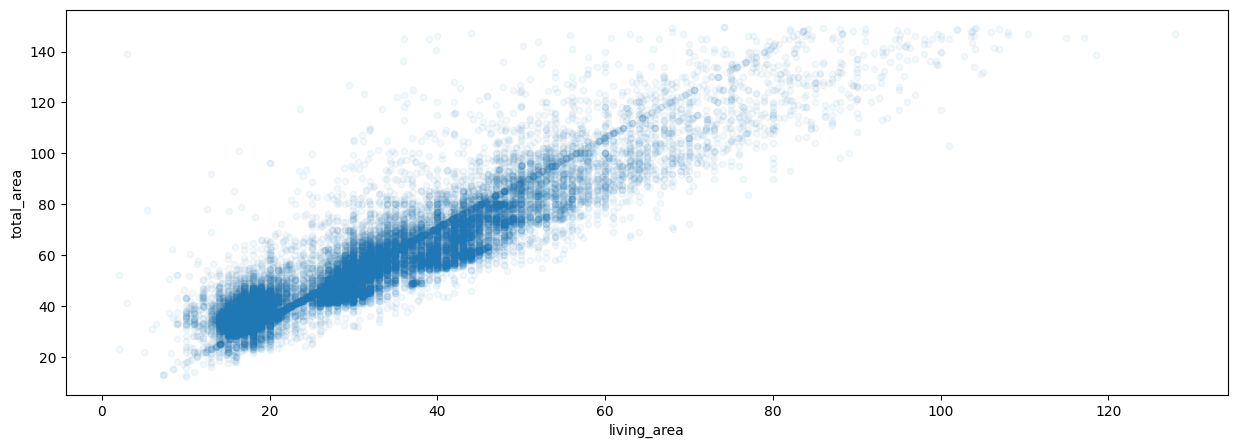

In [ ]:
data_150m.plot(x='living_area', y='total_area', kind='scatter', alpha=0.05, figsize=(15, 5))

<font color='green'>    
    На данном графике можно увидеть разброс данных из-за наличия типовых планировок. Думаю из этого можно сделать отдельное исследование.
</font>
<font color='green'>    
    Также явно прослеживается зависимый набор данных - в виде линии
</font>

In [ ]:
data_150m['living_area'].corr(data_ponds['last_price'])

0.5747506877424553

<font color='green'>    
    Положительная корреляция цены квартиры и жилой площади
</font>

### Площадь кухни - исследовательский анализ данных

<Axes: >

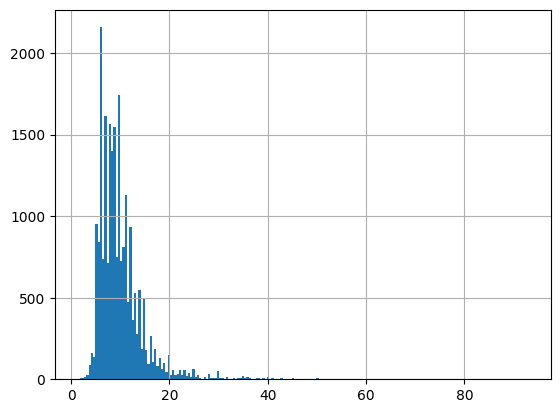

In [ ]:
data_150m['kitchen_area'].hist(bins=200)

<Axes: xlabel='kitchen_area', ylabel='price_m2'>

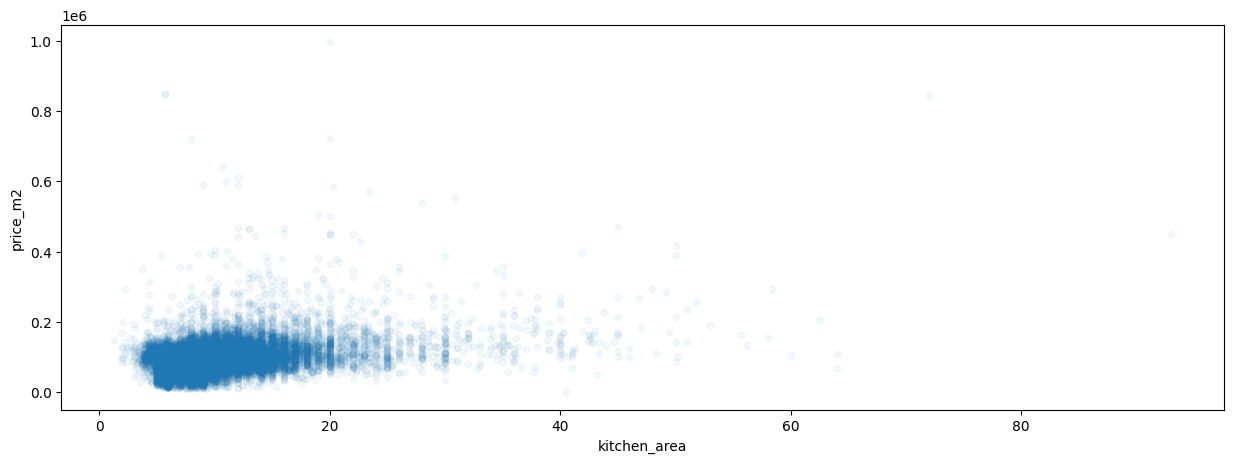

In [ ]:
data_150m.plot(x='kitchen_area', y='price_m2', kind='scatter', alpha=0.05, figsize=(15, 5))

<Axes: xlabel='kitchen_area', ylabel='total_area'>

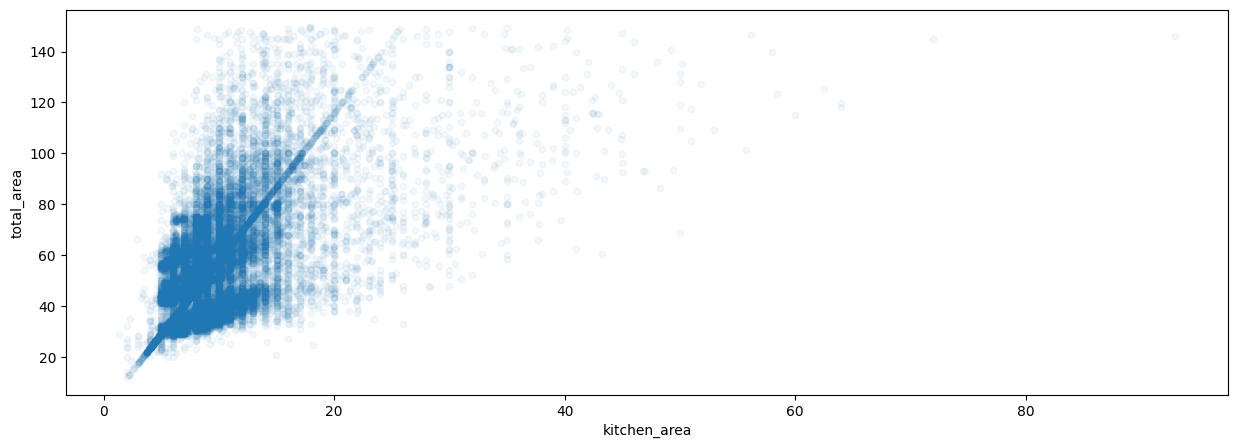

In [ ]:
data_150m.plot(x='kitchen_area', y='total_area', kind='scatter', alpha=0.05, figsize=(15, 5))

In [ ]:
data_150m['kitchen_area'].corr(data_ponds['last_price'])

0.5408667465413239

<font color='green'>    
    Положительная корреляция цены квартиры и площади кухни
</font>

### Цена объекта - исследовательский анализ данных

<font color='green'>    
    Посмотрим распределение значений цен на объекты
</font>

In [ ]:
data['last_price'].describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

<font color='green'>    
    Есть разброс цен, которые будут мешать анализу
</font>

In [ ]:
data_new['last_price_150'] = data['last_price'] > 15000000
(data_new['last_price_150'].mean())

0.050803831385290515

<font color='green'>    
    Удалим верхние значения выше 15 млн
</font>

<Axes: >

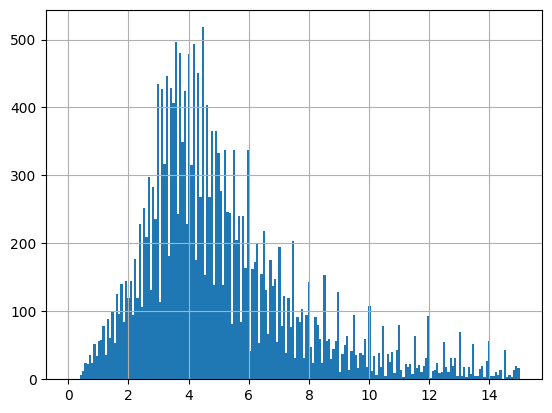

In [ ]:
#data_price_15mln = data_new.query('last_price < 15000000')
data_price_15mln = data_new[data_new.columns].copy()
data_price_15mln = data_price_15mln.query('last_price < 15000000')
data_price_15mln['last_price'] = data_price_15mln['last_price']/1000000
data_price_15mln['last_price'].hist(bins=200)

In [ ]:
(data_price_15mln['last_price'].median())

4.5

<font color='green'>    
    Посмотрим распределение медианной стоимости квартир в регионах по убыванию
</font>

In [ ]:
data.groupby('locality_name')['last_price'].median().sort_values(ascending=False).head()

locality_name
деревня Хязельки           11000000.0
деревня Бор                10397600.0
посёлок Александровская     8725000.0
посёлок Репино              8083708.0
Санкт-Петербург             5500000.0
Name: last_price, dtype: float64

<font color='green'>    
    Создадим два списка со средней ценой по региону и количеству квартир в нём
</font>

In [ ]:
locality_price_mean = data_new.pivot_table(index='locality_name', values='last_price', aggfunc=['mean', 'count'])
locality_price_mean.columns = ['price', 'count']
locality_price_mean.head(10)

price  count
locality_name                     
Без названия   6.745167e+06     49
Бокситогорск   8.461875e+05     16
Волосово       1.977778e+06     36
Волхов         1.739909e+06    111
Всеволожск     3.789068e+06    398
Выборг         3.250983e+06    237
Высоцк         1.810000e+06      4
Гатчина        3.488337e+06    307
Зеленогорск    6.288338e+06     24
Ивангород      1.486429e+06     28

Построим график

<Axes: xlabel='locality_name'>

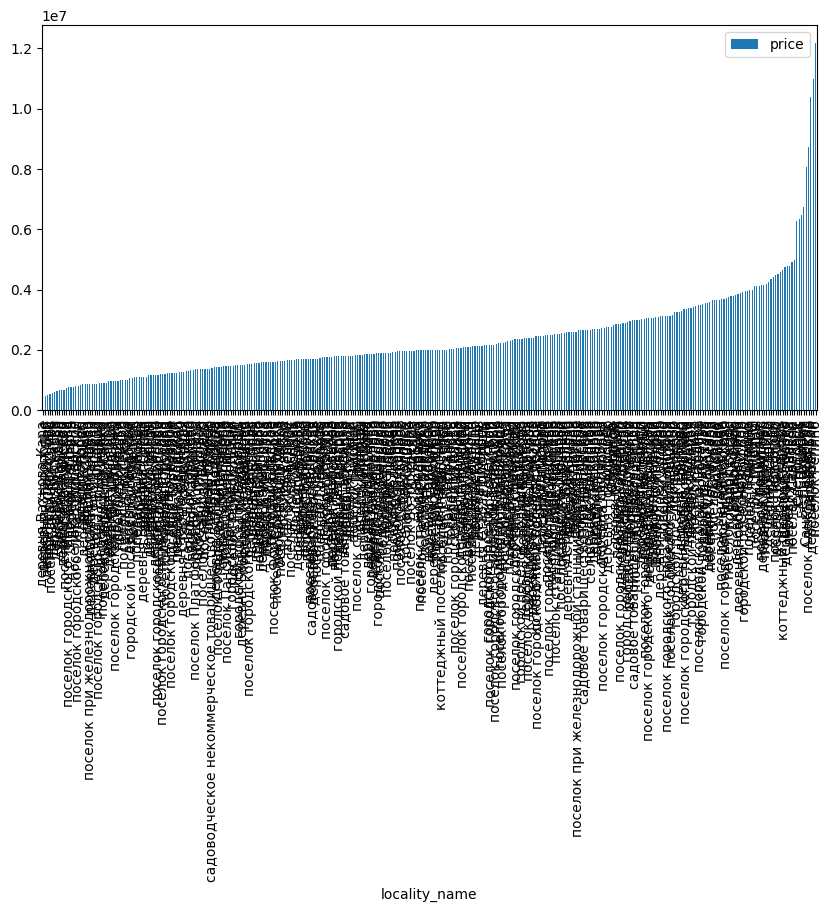

In [ ]:
locality_price_mean.sort_values(by='price').plot(y='price', kind='bar', figsize=(10, 5))


<font color='green'>    
    Отфильтруем регионы в которых продаётся меньше 20 квартир
</font>

<Axes: xlabel='locality_name'>

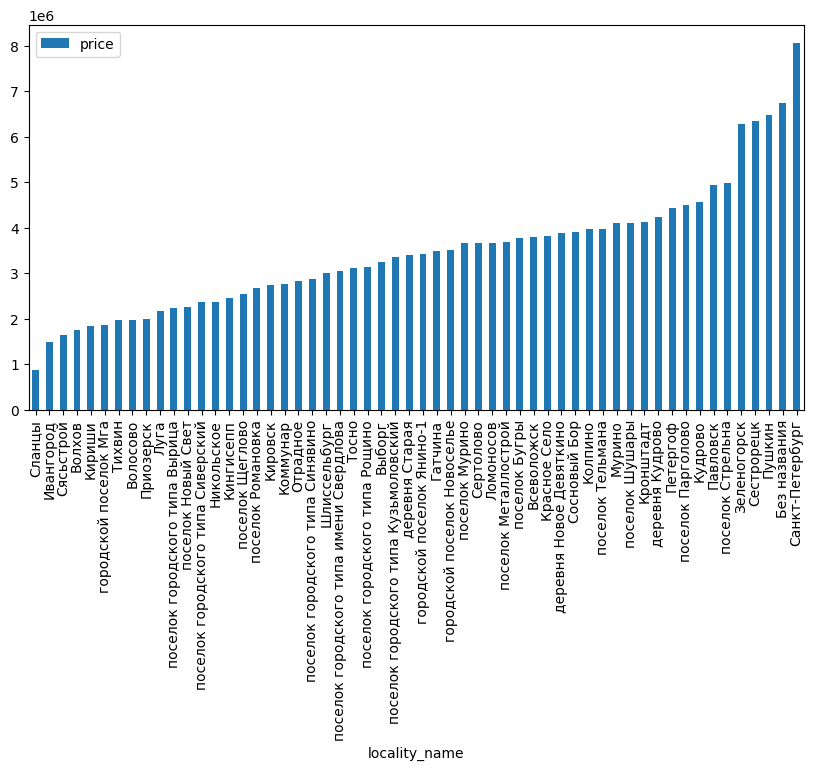

In [ ]:
locality_price_mean_20 = locality_price_mean.query('count > 20')
locality_price_mean_20.sort_values(by='price').plot(y='price', kind='bar', figsize=(10, 5))

<font color='green'>    
    Сгруппируем регионы в три группы по ценовому критерию и построим гистограммы распределения. <br>
    План второго исследования:<br>
    1) Вычислить в каждом регионе медианную стоимость<br>
    2) Назначить регионам критерий стоимости недвижимости - низкая, средняя, высокая.<br>
    3) Построить три отдельных гистограммы<br>
    4) Вывести списки регионов по этим группам<br>
</font>

<font color='green'>    
      1) Вычислим в каждом регионе медианную стоимость<br>
</font>

In [ ]:
locality_price_median = data_new.pivot_table(index='locality_name', values='last_price', aggfunc=['median', 'count'])
locality_price_median.columns = ['price', 'count']
locality_price_median.head(10)

price  count
locality_name                  
Без названия   5130593.0     49
Бокситогорск    785000.0     16
Волосово       1800000.0     36
Волхов         1600000.0    111
Всеволожск     3450000.0    398
Выборг         2897000.0    237
Высоцк         1825000.0      4
Гатчина        3100000.0    307
Зеленогорск    4750000.0     24
Ивангород      1300000.0     28

<font color='green'>    
      2) Назначим регионам критерий стоимости недвижимости - низкая, средняя, высокая.<br>
</font>

In [ ]:
def group_price(price):

    if 0 < price <= 1600000:
        return 'низкая'
    if 1600000 < price <= 2500000:
        return 'средняя'
    if price > 2500000:
        return 'высокая'
    return 'не известно'

locality_price_median['price_group'] = locality_price_median['price'].apply(group_price)
locality_price_median.groupby('price_group')['price_group'].count()

price_group
высокая    109
низкая     108
средняя    113
Name: price_group, dtype: int64

<font color='green'>    
      Выведем регионы согласно данному разделения списками <br>
</font>

<font color='green'>    
  <h1>Регионы с низкой медианной ценой - до 1,6 млн </h1><br>
</font></h2>

<Axes: xlabel='locality_name'>

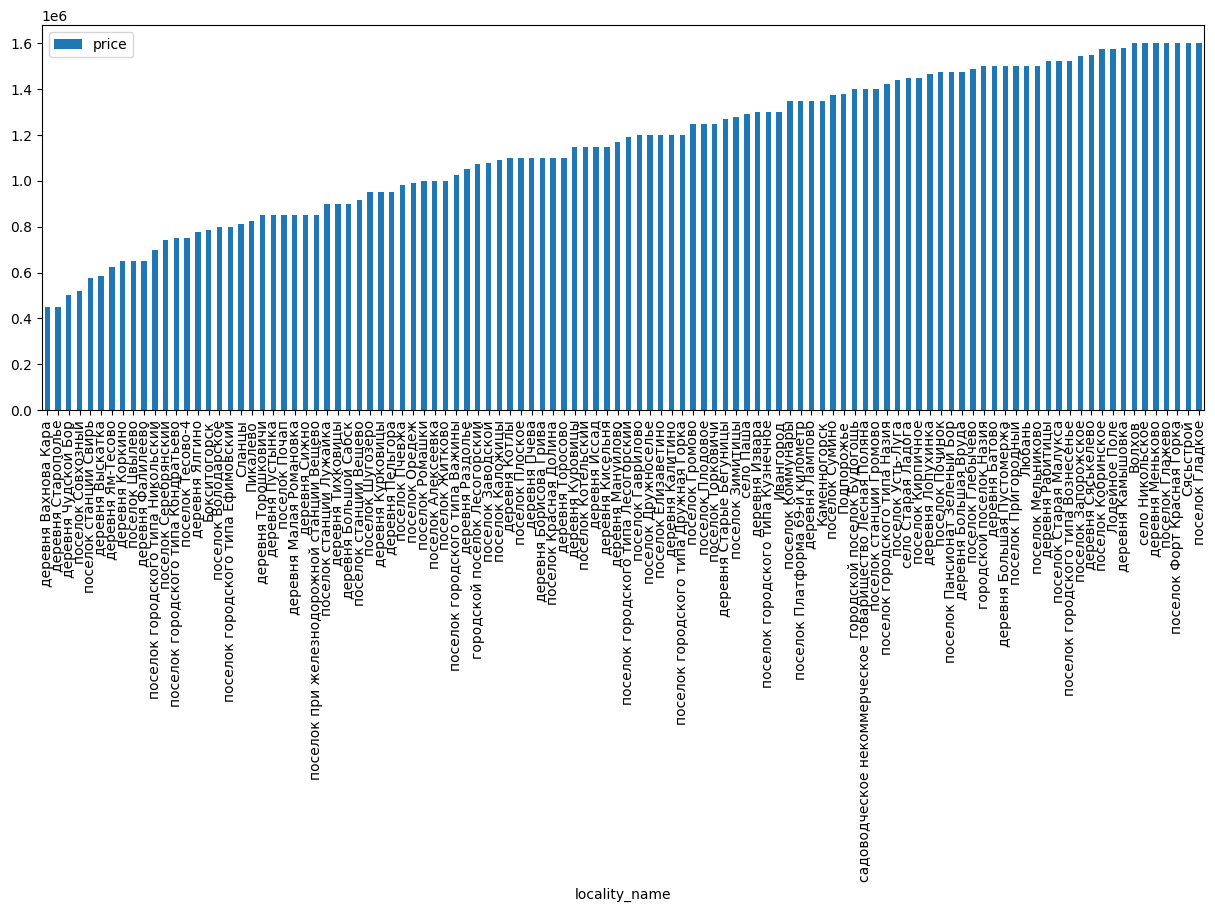

In [ ]:
locality_price_low = locality_price_median.query('price_group == "низкая"')
locality_price_low.sort_values(by='price').plot(y='price', kind='bar', figsize=(15, 5))

In [ ]:
locality_price_low.index

Index(['Бокситогорск', 'Волхов', 'Ивангород', 'Каменногорск', 'Лодейное Поле',
       'Любань', 'Пикалево', 'Подпорожье', 'Сланцы', 'Сясьстрой',
       ...
       'поселок городского типа Никольский',
       'поселок при железнодорожной станции Вещево', 'поселок станции Вещево',
       'поселок станции Громово', 'поселок станции Лужайка',
       'поселок станции Свирь',
       'садоводческое некоммерческое товарищество Лесная Поляна',
       'село Никольское', 'село Паша', 'село Старая Ладога'],
      dtype='object', name='locality_name', length=108)

<font color='green'>    
  <h1>Регионы со средней медианной ценой - от 1,6 млн до 2,5 млн руб</h1><br>
</font></h2>

<Axes: xlabel='locality_name'>

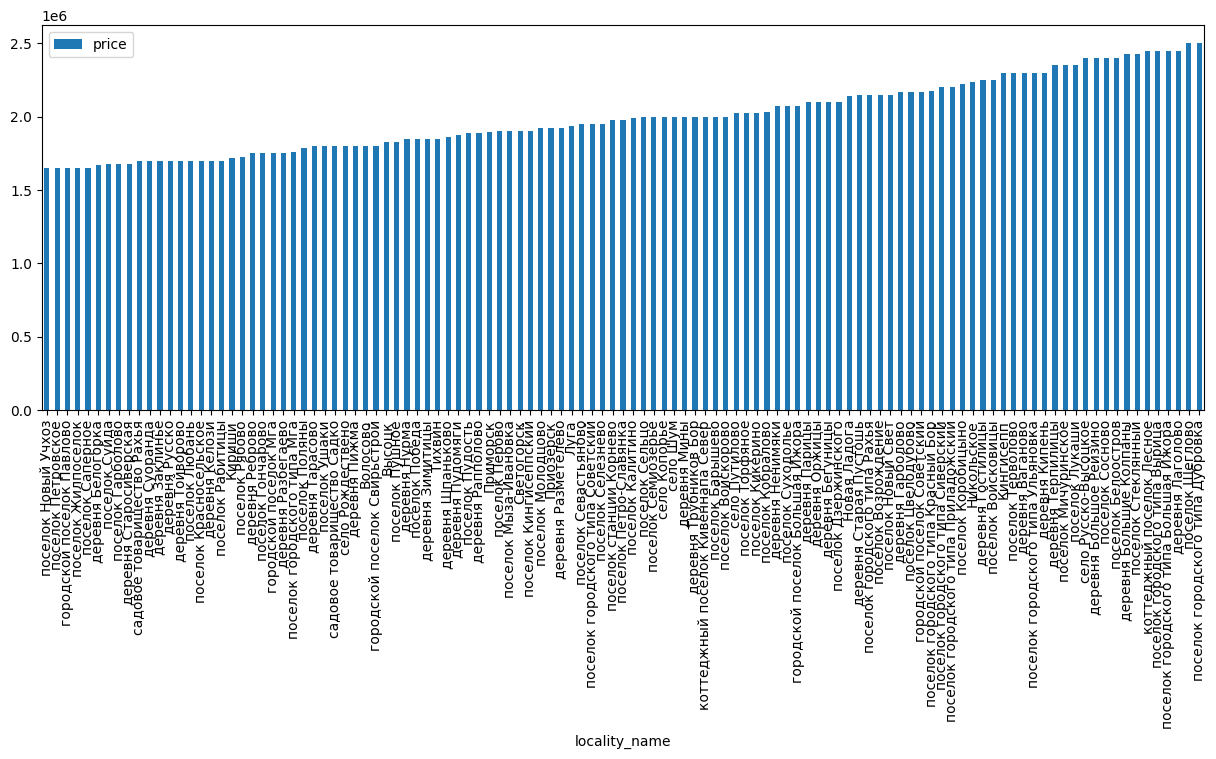

In [ ]:
locality_price_average = locality_price_median.query('price_group == "средняя"')
locality_price_average.sort_values(by='price').plot(y='price', kind='bar', figsize=(15, 5))

In [ ]:
locality_price_average.index

Index(['Волосово', 'Высоцк', 'Кингисепп', 'Кириши', 'Луга', 'Никольское',
       'Новая Ладога', 'Приморск', 'Приозерск', 'Светогорск',
       ...
       'поселок городского типа Советский',
       'поселок городского типа Ульяновка', 'поселок станции Корнево',
       'садовое товарищество Рахья', 'садовое товарищество Садко',
       'село Копорье', 'село Путилово', 'село Рождествено',
       'село Русско-Высоцкое', 'село Шум'],
      dtype='object', name='locality_name', length=113)

<font color='green'>    
  <h1>Регионы с высокой медианной ценой - от 2,5 млн</h1><br>
</font></h2>

<Axes: xlabel='locality_name'>

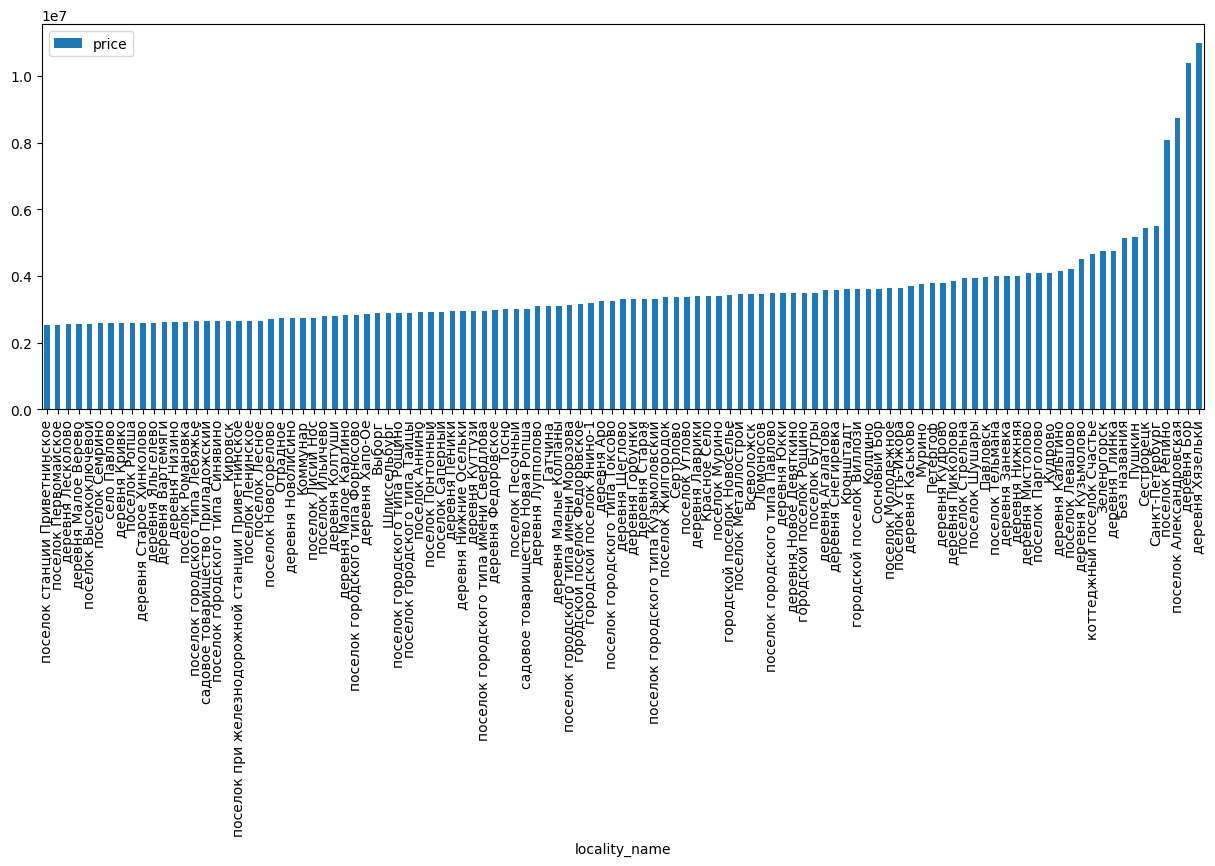

In [ ]:
locality_price_high = locality_price_median.query('price_group == "высокая"')
locality_price_high.sort_values(by='price').plot(y='price', kind='bar', figsize=(15, 5))

In [ ]:
locality_price_high.index

Index(['Без названия', 'Всеволожск', 'Выборг', 'Гатчина', 'Зеленогорск',
       'Кировск', 'Колпино', 'Коммунар', 'Красное Село', 'Кронштадт',
       ...
       'поселок городского типа Тайцы', 'поселок городского типа Токсово',
       'поселок городского типа Форносово',
       'поселок городского типа имени Морозова',
       'поселок городского типа имени Свердлова',
       'поселок при железнодорожной станции Приветнинское',
       'поселок станции Приветнинское', 'садовое товарищество Новая Ропша',
       'садовое товарищество Приладожский', 'село Павлово'],
      dtype='object', name='locality_name', length=109)

<font color='green'>    
  <h1>Три распределения по количеству объектов с одинаковой ценой по непонятной категории</h1><br>
</font></h2>

<Axes: >

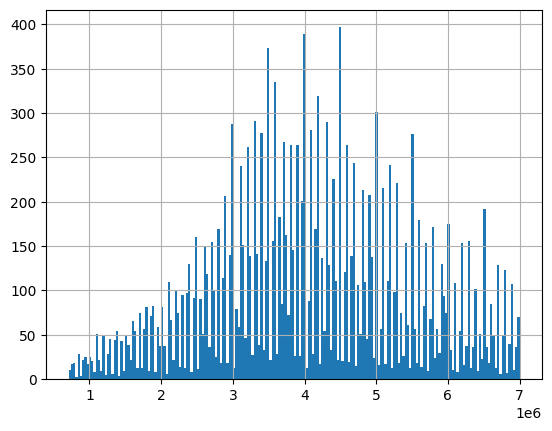

In [ ]:
data_price_07_70 = data_new.query('700000 < last_price < 7000000' )
data_price_07_70['last_price'].hist(bins=200)

  <font color='green'>    
  На графике наблюдаются три распределения. Это распределения групп квартир по типовому критерию. Скорее всего это регион, но может быть и тип жилья. Проверим гипотезу.<br>
</font>

<Axes: xlabel='price_m2', ylabel='last_price'>

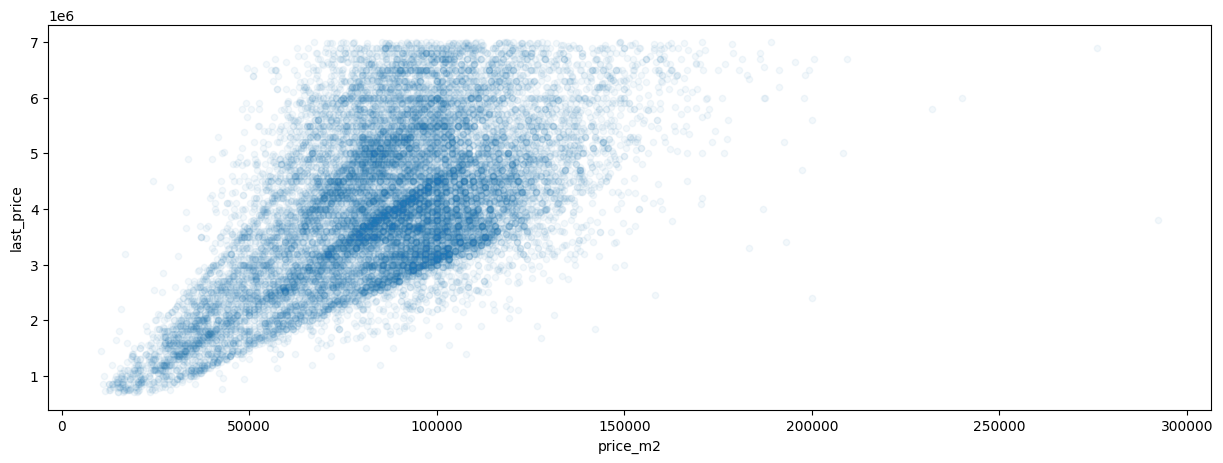

In [ ]:
data_price_07_70.plot(x='price_m2', y='last_price', kind='scatter', alpha=0.05, figsize=(15, 5))

  <font color='green'>    
  Лучи на графике - квартиры равной площади в разных регионах.  <br>
</font>

### Количество комнат - исследовательский анализ данных

In [ ]:
data_new['rooms'].describe()

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

In [ ]:
data_new['rooms'].corr(data_new['total_area']), data_new['rooms'].corr(data_new['last_price'])

(0.7583438234725668, 0.36334284996489546)

  <font color='green'>    
  Наблюдается высокая корреляция числа комнат и общей площади, а также корреляция числа комнат к продажной цене.  <br>
</font>

In [ ]:
data_new_rooms = data_new.pivot_table(index='rooms', values='last_price', aggfunc=['median', 'count']).reset_index()
data_new_rooms.columns = ['rooms', 'median_price', 'count']
data_new_rooms.head(10)

rooms  median_price  count
0      0     2700000.0    197
1      1     3600000.0   8047
2      2     4770169.0   7940
3      3     6200000.0   5814
4      4     9000000.0   1180
5      5    14000000.0    326
6      6    19000000.0    105
7      7    24900000.0     59
8      8    23095000.0     12
9      9    23750000.0      8

  <font color='green'>    
  Больше всего продаётся 1, 2, 3, 4-х комнатные квартиры. <br>
  Чем больше комнат, тем дороже квартира. <br>
  Скорее всего, параметром в непонятном распределении явно является количество комнат.  <br>
</font>

<Axes: ylabel='count'>

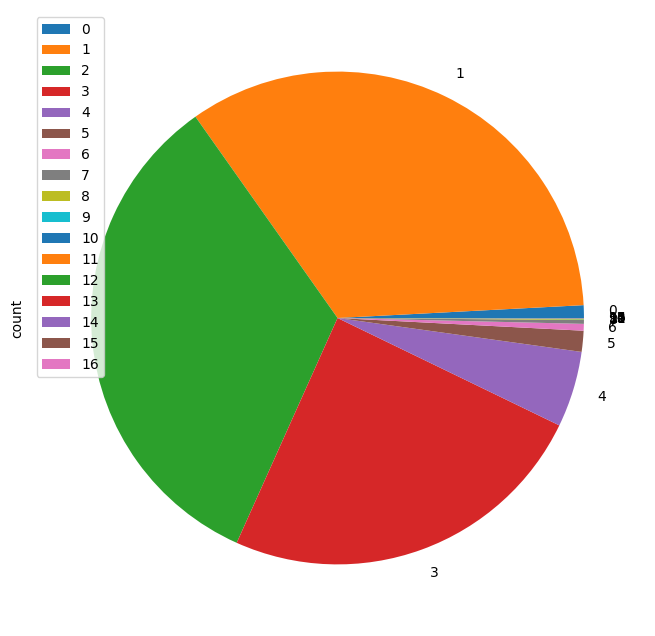

In [ ]:
data_new_rooms.plot(y='count', kind='pie', figsize=(8, 8))

  <font color='green'>    
  Найдём распределение цен "однушек" <br>
</font>

<Axes: >

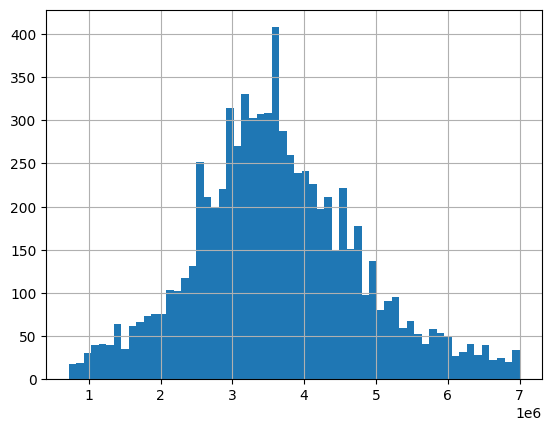

In [ ]:
data_new_1k = data_price_07_70.query('rooms	 == 1')
data_new_1k['last_price'].hist(bins=60)

  <font color='green'>    
  Найдём распределение цен "двушек" <br>
</font>

<Axes: >

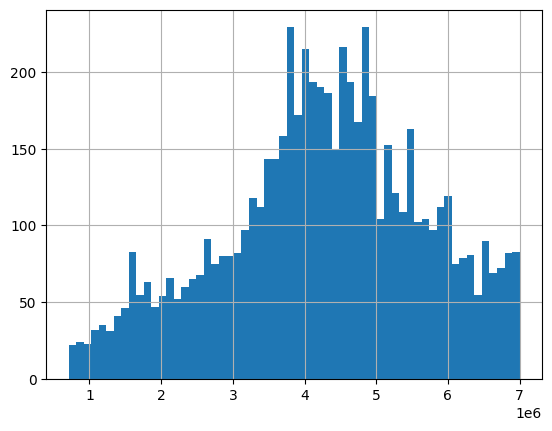

In [ ]:
data_new_2k = data_price_07_70.query('rooms	 == 2')
data_new_2k['last_price'].hist(bins=60)

In [ ]:
data_new_3k = data_price_07_70.query('rooms	 == 3')
data_new_4k = data_price_07_70.query('rooms	 == 4')
data_new_5k = data_price_07_70.query('rooms	 == 5')
data_new_6k = data_price_07_70.query('rooms	 == 6')
data_new_7k = data_price_07_70.query('rooms	 == 7')
data_new_8k = data_price_07_70.query('rooms	 == 8')

### Высота потолков - исследовательский анализ данных

  <font color='green'>    
  После удаления некорректных данных и строк с пропусками, мы получили такой набор данных: <br>
</font>

In [ ]:
data_ceiling_height['ceiling_height'].describe()

count    14474.000000
mean         2.725714
std          0.270470
min          2.200000
25%          2.520000
50%          2.650000
75%          2.800000
max          4.900000
Name: ceiling_height, dtype: float64

<Axes: xlabel='ceiling_height'>

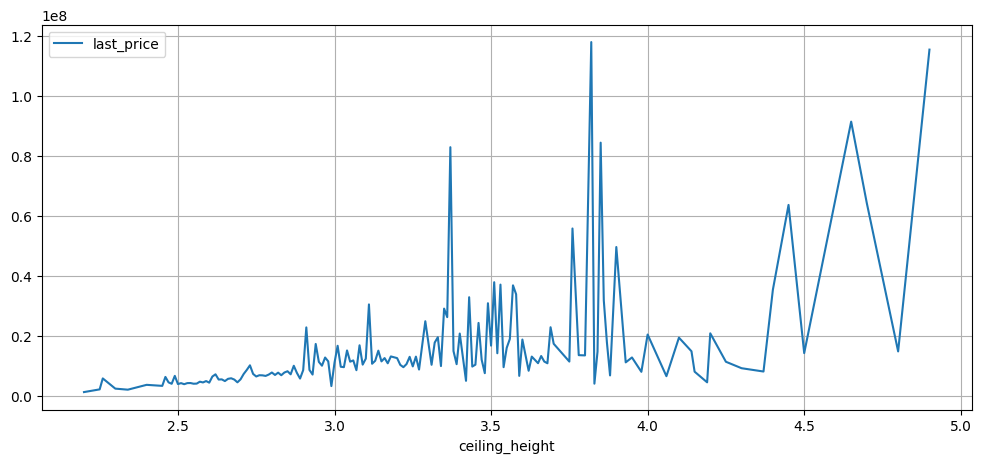

In [ ]:
data_ceiling_height.pivot_table(index='ceiling_height', values='last_price').plot(grid=True, figsize=(12, 5))

<font color='green'>     
    Прослеживается явная связь между высотой потолков и ценой объекта.  Посмотрим распределение значений по количеству.<br>
</font>

In [ ]:
data_ceiling_height2 = data_ceiling_height.pivot_table(index='ceiling_height', values='last_price', aggfunc=['mean', 'count'])
data_ceiling_height2.columns = ['last_price', 'count']
data_ceiling_height2.sort_values(by='count', ascending=False).head(10)

last_price  count
ceiling_height                     
2.50            4.076288e+06   3522
2.60            4.538475e+06   1647
2.70            5.650177e+06   1582
3.00            1.117410e+07   1112
2.80            7.917276e+06    993
2.55            4.184457e+06    980
2.75            6.598428e+06    911
2.65            5.068970e+06    676
3.20            1.271751e+07    279
3.10            1.255287e+07    203

<font color='green'>     
   Самым "популярным" значением для реализуемых квартир - потолок высотой 2.5 метра и средней ценой 4,08 млн. руб.
</font>

In [ ]:
data_ceiling_height2 = data_ceiling_height.pivot_table(index='ceiling_height', values='last_price', aggfunc=['mean', 'count'])
data_ceiling_height2.columns = ['last_price', 'count']
data_ceiling_height2.sort_values(by='last_price', ascending=False).head(10)

last_price  count
ceiling_height                     
3.82            1.180000e+08      1
4.90            1.154900e+08      1
4.65            9.150000e+07      1
3.85            8.449200e+07      2
3.37            8.298210e+07      4
4.70            6.432500e+07      2
4.45            6.375000e+07      2
3.76            5.590000e+07      1
3.90            4.972714e+07     14
3.51            3.800000e+07      2

<font color='green'>     
   Дорогие квартиры имеют высокие потолки.
</font>

In [ ]:
data_ceiling_height['ceiling_height'].corr(data_ceiling_height['last_price'])

0.3882744024988696

<font color='green'>     
   Корреляция значений высот потолков и цен на объект недвижимости 39%
</font>

### Тип этажа квартиры («первый», «последний», «другой») - исследовательский анализ данных

<font color='green'>     
   Посмотрим как отличаются цены на одинаковый тип недвижимости, расположенный на разных этажах.<br>
    План исследования:
    1) Посмотреть распределение цен по этажам для 1, 2, 3-х комнатных квартир;
    2) Посмотреть распределение цен категориям этажей («первый», «последний», «другой») для 1, 2, 3-х и комнатных квартир;
    
</font>

<font color='green'>     
  <h4>Однокомнатные квартиры</h4>
</font>

In [ ]:
data_new_1k_floor = data_new_1k.pivot_table(index='floor', values='last_price', aggfunc=['median', 'min', 'count']).reset_index()
data_new_1k_floor.columns = ['floor', 'median_price', 'min_price', 'count']
data_new_1k_floor.head(10)

floor  median_price  min_price  count
0      0     3050000.0   720000.0    790
1      2     3250000.0   720000.0    913
2      3     3300000.0   780000.0    869
3      4     3390000.0   770000.0    747
4      5     3300000.0   720000.0    736
5      6     3694500.0  1250000.0    432
6      7     3700000.0   850000.0    449
7      8     3690000.0  1650000.0    386
8      9     3700000.0  1740000.0    392
9     10     3993500.0  1846230.0    288

<Axes: xlabel='floor', ylabel='last_price'>

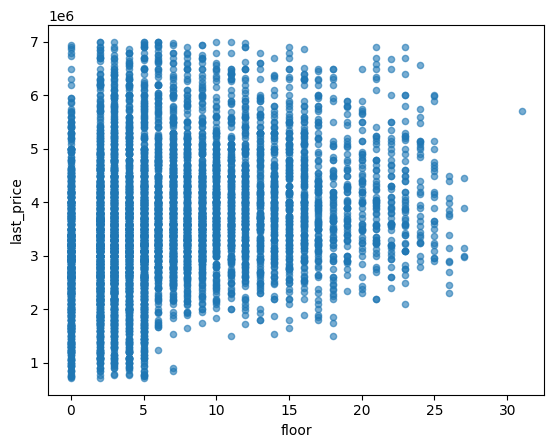

In [ ]:
data_new_1k.plot(x='floor', y='last_price', kind='scatter', alpha=0.6)

In [ ]:
data_new_1k_floor['floor'].corr(data_new_1k_floor['median_price'])

0.6068633979215189

<font color='green'>     
  1)  Положительная корреляция цен и этажей 60%: этажи растут - цены растут.
</font>

In [ ]:
data_new_1k_floor['floor'].corr(data_new_1k_floor['count'])

-0.9037589948004275

<font color='green'>     
   2) Отрицательная корреляция количества объектов и этажей 60%: этажи растут - объектов становится меньше. На высоких этажах, однокомнатных квартир продают меньше. <br>
    3) До пятого этажа квартиры имеют равномерно минимальные цены. (Хрущевки?). Третий и четвёртые этажи - чуть дороже. По классике жанра.
</font>

In [ ]:
data_new_1k_floor = data_new_1k.pivot_table(index='floors_group', values='last_price', aggfunc=['median', 'min', 'count']).reset_index()
data_new_1k_floor.columns = ['floors_group', 'median_price', 'min_price', 'count']
data_new_1k_floor.head()

floors_group  median_price  min_price  count
0       другой     3650000.0   720000.0   6029
1  не известно     3265770.0  1995000.0     28
2  первый этаж     3050000.0   720000.0    790
3    последний     3190000.0   720000.0    877

<font color='green'>     
   4) Медианная цена однокомнатных квартир: для первых и последних этажей дешевле промежуточных на 16%.
</font>

<font color='green'>     
  <h4> Двухкомнатные квартиры</h4>
</font>

In [ ]:
data_new_2k_floor = data_new_2k.pivot_table(index='floor', values='last_price', aggfunc=['median', 'min', 'count']).reset_index()
data_new_2k_floor.columns = ['floor', 'median_price', 'min_price', 'count']
data_new_2k_floor.head()

floor  median_price  min_price  count
0      0     3700000.0   750000.0   1018
1      2     4000000.0   710000.0    972
2      3     4100000.0   720000.0    819
3      4     4100000.0   730000.0    733
4      5     4000000.0   750000.0    795

<Axes: xlabel='floor', ylabel='last_price'>

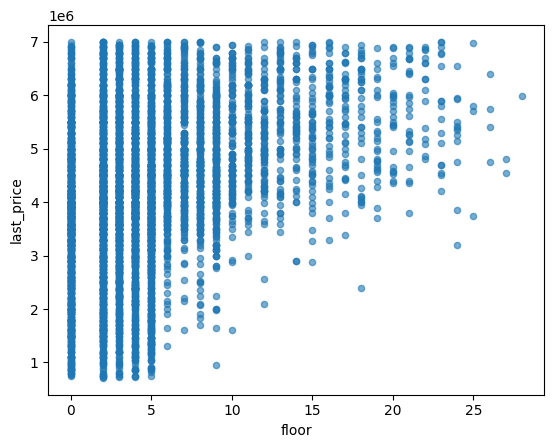

In [ ]:
data_new_2k.plot(x='floor', y='last_price', kind='scatter', alpha=0.6)

In [ ]:
data_new_2k_floor = data_new_2k.pivot_table(index='floors_group', values='last_price', aggfunc=['median', 'min', 'count']).reset_index()
data_new_2k_floor.columns = ['floors_group', 'median_price', 'min_price', 'count']
data_new_2k_floor.head()

floors_group  median_price  min_price  count
0       другой     4550000.0   720000.0   4192
1  не известно     5199739.0  3440000.0     20
2  первый этаж     3700000.0   750000.0   1018
3    последний     3890000.0   710000.0   1009

<font color='green'>     
   4) Медианная цена двухкомнатных квартир: для первых и последних этажей дешевле промежуточных на 19%.
</font>

<font color='green'>     
  <h4> Трёхкомнатные квартиры</h4>
</font>

In [ ]:
data_new_3k_floor = data_new_3k.pivot_table(index='floor', values='last_price', aggfunc=['median', 'min', 'count']).reset_index()
data_new_3k_floor.columns = ['floor', 'median_price', 'min_price', 'count']
data_new_3k_floor.head()

floor  median_price  min_price  count
0      0     4550000.0   730000.0    583
1      2     4745000.0   790000.0    540
2      3     4900000.0   850000.0    484
3      4     4900000.0  1100000.0    459
4      5     4800000.0   790000.0    448

<Axes: xlabel='floor', ylabel='last_price'>

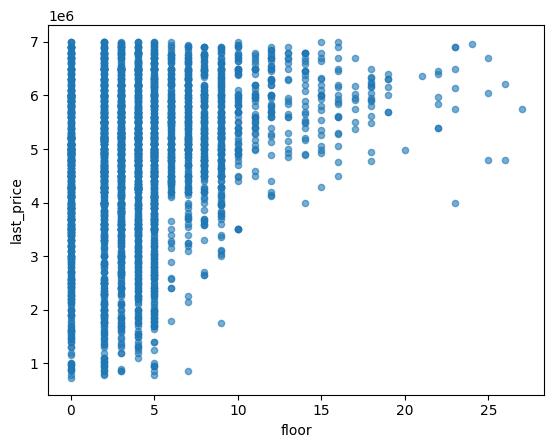

In [ ]:
data_new_3k.plot(x='floor', y='last_price', kind='scatter', alpha=0.6)

In [ ]:
data_new_3k_floor = data_new_3k.pivot_table(index='floors_group', values='last_price', aggfunc=['median', 'min', 'count']).reset_index()
data_new_3k_floor.columns = ['floors_group', 'median_price', 'min_price', 'count']
data_new_3k_floor.head()

floors_group  median_price  min_price  count
0       другой     5200000.0   800000.0   2358
1  не известно     5573692.5  3650000.0      8
2  первый этаж     4550000.0   730000.0    583
3    последний     4650000.0   790000.0    550

<font color='green'>     
   4) Медианная цена трёхкомнатных квартир: для первых и последних этажей дешевле промежуточных на 12,5%.
</font>

<font color='green'>     
   5) Многокомнатных квартир на верхних этажах наблюдается мало.
</font>

In [ ]:
data_new_4k_floor = data_new_4k.pivot_table(index='floor', values='last_price', aggfunc=['median', 'min', 'count']).reset_index()
data_new_4k_floor.columns = ['floor', 'median_price', 'min_price', 'count']
data_new_4k_floor.head(30)

floor  median_price  min_price  count
0       0     5400000.0  1150000.0     89
1       2     4200000.0   999000.0     72
2       3     4250000.0  2100000.0     51
3       4     4490000.0  2000000.0     59
4       5     4500000.0  1500000.0     50
5       6     6399500.0  4500000.0     12
6       7     5800000.0  4600000.0     15
7       8     5557500.0  3700000.0      8
8       9     5800000.0  3450000.0     20
9      10     6079000.0  5508000.0      2
10     11     6500000.0  6500000.0      1
11     12     6750000.0  6600000.0      2
12     17     6757702.0  6600000.0      3
13     18     5430000.0  5430000.0      1

<Axes: xlabel='floor', ylabel='rooms'>

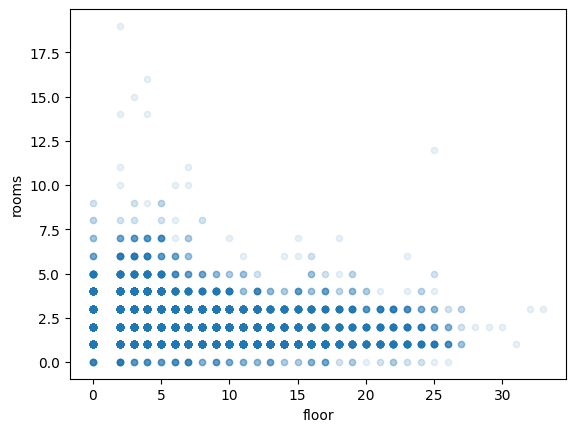

In [ ]:
data_new.plot(x='floor', y='rooms', kind='scatter', alpha=0.1)

<br>Добавим график, на котором будет отображено количество квартир по каждой из категорий этажей
</div>

<Axes: >

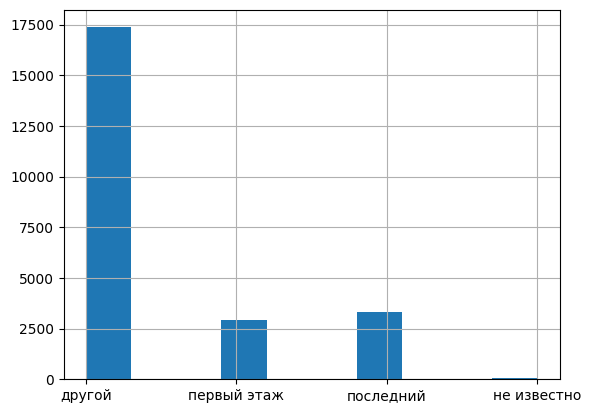

In [ ]:
data_new['floors_group'].hist()

### Общее количество этажей в доме - исследовательский анализ данных

<font color='green'>     
   План исследования: <br>
    1) Посмотреть распределение этажности домов по количеству.<br>
    2) Посмотреть распределение средних цен на квартиры в разноэтажных домах.<br>
</font>

In [ ]:
data_new_floor = data_new.pivot_table(index='floors_total', values=('last_price', 'total_area'), aggfunc=['median', 'min', 'count']).reset_index()
data_new_floor.columns = ['floors_total', 'median_price', 'median_area', 'min_price', 'min_area', 'count', 'count']
data_new_floor.head(30)

floors_total  median_price  median_area  min_price  min_area  count  count
0           -1.0     5192500.0        55.95  1640000.0     23.17     86     86
1            1.0     2300000.0        54.00   450000.0     31.00     25     25
2            2.0     2050000.0        45.00   430000.0     18.00    383    383
3            3.0     3675000.0        54.20   430000.0     18.40    668    668
4            4.0     5920545.5        62.00   560000.0     17.00   1200   1200
5            5.0     3700000.0        48.50   440000.0     12.00   5788   5788
6            6.0     7925000.0        74.00  1300000.0     16.00    914    914
7            7.0     7670000.0        67.85  1750000.0     20.00    592    592
8            8.0     7226770.0        70.80  1500000.0     21.40    390    390
9            9.0     4400000.0        50.20   850000.0     13.00   3761   3761
10          10.0     5200000.0        57.15  1600000.0     20.00   1174   1174
11          11.0     6740000.0        59.10  2100000.0     23.80    203    203
12          12.0     4999000.0        52.00  1650000.0     21.70   1362   1362
13          13.0     6200000.0        55.80  2000000.0     31.23    229    229
14          14.0     4900000.0        50.70  1600000.0     22.23    553    553
15          15.0     4950000.0        54.00  1315000.0     20.50    365    365
16          16.0     5425000.0        52.50  1500000.0     18.90   1376   1376
17          17.0     5100000.0        45.00  1945000.0     21.90    833    833
18          18.0     4800000.0        46.50  1495000.0     20.60    505    505
19          19.0     5100000.0        47.00  1300000.0     18.80    339    339
20          20.0     5999000.0        55.56  2175000.0     23.40    271    271
21          21.0     4953668.0        45.25  2199000.0     22.30    158    158
22          22.0     4875000.0        44.00  1730000.0     20.00    286    286
23          23.0     4999999.5        51.05  1846648.0     17.20    352    352
24          24.0     4995573.0        44.50  1811250.0     20.67    469    469
25          25.0     5239000.0        50.60    12190.0     20.50   1075   1075
26          26.0     4500000.0        41.85  1780000.0     28.00    124    124
27          27.0     3795000.0        38.00  1880000.0     23.00    164    164
28          28.0     6090000.0        60.00  2800000.0     35.00     21     21
29          29.0     4100000.0        43.20  4100000.0     43.20      1      1

In [ ]:
data_new_floor['floors_total'].corr(data_new_floor['median_price']), data_new_floor['floors_total'].corr(data_new_floor['median_area'])

(0.02917048677418637, -0.18395047069130718)

<font color='green'>     
    Для полного набора данных:<br>
    1) Как и ожидалось - больше всего домов 5-ти и 9-ти этажей<br>
    2) Наблюдается слабая положительная корреляция - чем выше дом тем дороже квартира;<br>
    3) Наблюдается средняя отрицательная корреляция - чем выше дом, тем меньше площадь квартиры.  <br>
    <br>
    Сегментируем исследование для 1,2,3-х комнатных квартир<br>
</font>

In [ ]:
data_new_floor_1k = data_new_1k.pivot_table(index='floors_total', values=('last_price', 'total_area'), aggfunc=['median', 'min', 'count']).reset_index()
data_new_floor_1k.columns = ['floors_total', 'median_price', 'median_area', 'min_price', 'min_area', 'count', 'count']

data_new_floor_2k = data_new_2k.pivot_table(index='floors_total', values=('last_price', 'total_area'), aggfunc=['median', 'min', 'count']).reset_index()
data_new_floor_2k.columns = ['floors_total', 'median_price', 'median_area', 'min_price', 'min_area', 'count', 'count']

data_new_floor_3k = data_new_3k.pivot_table(index='floors_total', values=('last_price', 'total_area'), aggfunc=['median', 'min', 'count']).reset_index()
data_new_floor_3k.columns = ['floors_total', 'median_price', 'median_area', 'min_price', 'min_area', 'count', 'count']

In [ ]:
data_new_floor_1k['floors_total'].corr(data_new_floor_1k['median_price']), data_new_floor_1k['floors_total'].corr(data_new_floor_1k['median_area'])

(0.5168038464950765, 0.36813269463948606)

In [ ]:
data_new_floor_2k['floors_total'].corr(data_new_floor_2k['median_price']), data_new_floor_2k['floors_total'].corr(data_new_floor_2k['median_area'])

(0.42658543953426664, 0.09692028136839077)

In [ ]:
data_new_floor_3k['floors_total'].corr(data_new_floor_3k['median_price']), data_new_floor_3k['floors_total'].corr(data_new_floor_3k['median_area'])

(0.6732486687091159, 0.4560850609327333)

<font color='green'>     
    Для сегментированных наборов:<br>
    1) Для однокомнатных и трёхкомнатных квартир - чем выше дом, тем больше квартира и дороже<br>
    2) Для двухкомнатных квартир - цена квартиры дорожает, а вот площадь не сильно растёт;<br>
    <br>
</font>

### Расстояние до центра города в метрах - исследовательский анализ данных

<font color='green'>    
   План исследования:<br>
   1) Проверим корреляцию данных - расстояния до центра и цены квартиры; расстояния до центра и и количества комнат квартиры.<br>
   2) Визуализируем зависимости
   </font>

In [ ]:
data_cityCenters_nearest['cityCenters_nearest'].corr(data_cityCenters_nearest['last_price'])

-0.20674734874298376

In [ ]:
data_cityCenters_nearest['cityCenters_nearest'].corr(data_cityCenters_nearest['rooms'])

-0.1848638754833977

<font color='green'>    
    Наблюдается средняя отрицательная корреляция: ближе к центру дороже и ближе к центру больше комнат.
</font>

<font color='green'>    
    Оставим для анализа только Санкт-Петербург с ценой меньше 40 млн
</font>

In [ ]:
data_cityCenters_nearest_spb = data_cityCenters_nearest.query('locality_name == "Санкт-Петербург" & last_price < 40000000')
data_cityCenters_nearest_spb.groupby('locality_name')['cityCenters_nearest'].count()

locality_name
Санкт-Петербург    15471
Name: cityCenters_nearest, dtype: int64

<font color='green'>    
   Зависимости увеличения цены и количества комнат для объектов находящихся ближе к центру города.
</font>

<Axes: xlabel='cityCenters_nearest', ylabel='last_price'>

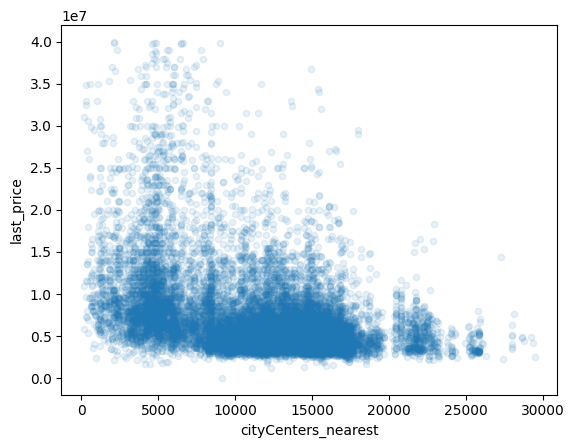

In [ ]:
data_cityCenters_nearest_spb.plot(x='cityCenters_nearest', y='last_price', kind='scatter', alpha=0.1)

<Axes: xlabel='cityCenters_nearest', ylabel='rooms'>

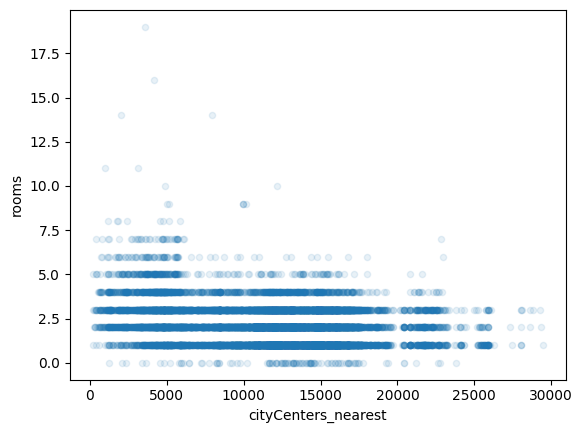

In [ ]:
data_cityCenters_nearest_spb.plot(x='cityCenters_nearest', y='rooms', kind='scatter', alpha=0.1)

### Расстояние до ближайшего парка - исследовательский анализ данных

<font color='green'>    
   План исследования:<br>
    1) Сгруппировать данные в таблице данных data_parks по квартилям<br>
    2) Посмотреть изменение цен<br>
</font>

In [ ]:
data_parks['parks_nearest'].describe()

count    8079.000000
mean      490.804555
std       342.317995
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

In [ ]:
def parks_nearest(nearest):

    if 0 < nearest <= 288.000000:
        return '25% - до 288 метров'
    if 288.000000 < nearest <= 455.000000:
        return '50% - до 455 метров'
    if 455.000000 < nearest <= 612.000000:
        return '75% - до 612 метров'
    return 'дальше 612 метров'
data_parks['nearest_group'] = data_parks['parks_nearest'].apply(parks_nearest)
data_parks.groupby('nearest_group')['nearest_group'].count()

nearest_group
25% - до 288 метров    2045
50% - до 455 метров    2007
75% - до 612 метров    2013
дальше 612 метров      2014
Name: nearest_group, dtype: int64

In [ ]:
data_parks2 = data_parks.pivot_table(index='nearest_group', values='last_price', aggfunc=['median', 'count'])
data_parks2.columns = ['last_price_median', 'count']
data_parks2.sort_values(by='last_price_median', ascending=False).head(10)

last_price_median  count
nearest_group                                
дальше 612 метров            5995000.0   2014
25% - до 288 метров          5990000.0   2045
50% - до 455 метров          5800000.0   2007
75% - до 612 метров          5700000.0   2013

In [ ]:
data_parks['parks_nearest'].corr(data_parks['last_price'])

-0.01641392745398596

<font color='green'>    
    Наблюдается слабая отрицательная корреляция, ближе к парку - дороже.<br>
</font>

### Как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.

<font color='green'>    
    Сравним показатели<br>
</font>

In [ ]:
data_support_days.groupby('year_publication')['days_exposition'].describe()

count        mean         std    min    25%    50%  \
year_publication                                                        
2014               119.0  910.983193  296.115414  554.0  607.5  875.0   
2015              1121.0  648.035682  318.759788  182.0  389.0  576.0   
2016              2716.0  320.748159  256.819800    3.0  114.0  235.0   
2017              7919.0  158.955929  153.232558    3.0   45.0  103.0   
2018              7560.0   94.337963   85.171023    3.0   34.0   64.0   
2019              1083.0   30.931671   23.828503    1.0   12.0   23.0   

                      75%     max  
year_publication                   
2014              1120.00  1580.0  
2015               881.00  1512.0  
2016               475.25  1153.0  
2017               227.00   825.0  
2018               131.00   465.0  
2019                45.00   110.0

<font color='green'>    
    Со временем сервис стал работать лучше (Видимо появился контроль проданных квартир и данные стали удаляться) или покупательская способность подросла. В 2019 году медианное время продажи квартиры равнялось 23 дням.<br>
    Самая долгая продажа 1580 дней в 2014 году. Самая быстрая 1 день - в 2019 году.
</font>

<Axes: >

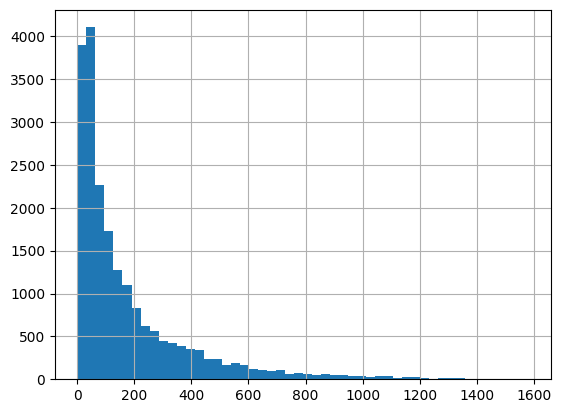

In [ ]:
data_support_days['days_exposition'].hist(bins=50)

<br>Посмотрим на диапазон от 0 до 100 дней. Там есть пики, которым можно найти очень логичное объяснение</div>
</div>

In [ ]:
data_support_days_100 = data_support_days.query('days_exposition < 100')

<Axes: >

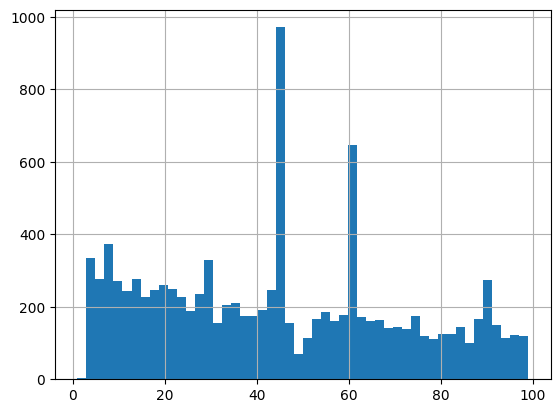

In [ ]:
data_support_days_100['days_exposition'].hist(bins=50)

<font color='green'>    
    Наблюдаютмя пики снятия с продаж 30, 45, 60 и 90. Могу предположить что работал сервис - по типу: "будете удалять" или продлеваете?
</font>

###  "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
  <br>
  <font color='green'>    
  - total_area — общей площади квартиры в квадратных метрах (м²);<br>
  - жилой площади;<br>
  - площади кухни;<br>
  - количество комнат;<br>
  - типа этажа, на котором расположена квартира (первый, последний, другой);<br>
  - даты размещения (день недели, месяц, год)<br>
</font>

<font color='green'>    
  <h1>Зависимость цены от общей площади</h1><br>
</font></h2>

<font color='green'>    
  План исследования: <br>
    1) Посмотреть корреляцию <br>
    2) Построить график отражающий зависимость <br>
    3) Сгруппировать данные по общей площади объектов по диапазонам: до 30 м, до 50 м, до 70 м, выше 70 м <br>
</font>

In [ ]:
data_price_15mln['last_price'].corr(data_price_15mln['total_area'])

0.742799198778926

<font color='green'>    
  Корреляция высокая положительная: больше площадь - больше цена <br>
    
  Построим график отражающий зависимость.
</font>

<Axes: xlabel='last_price', ylabel='total_area'>

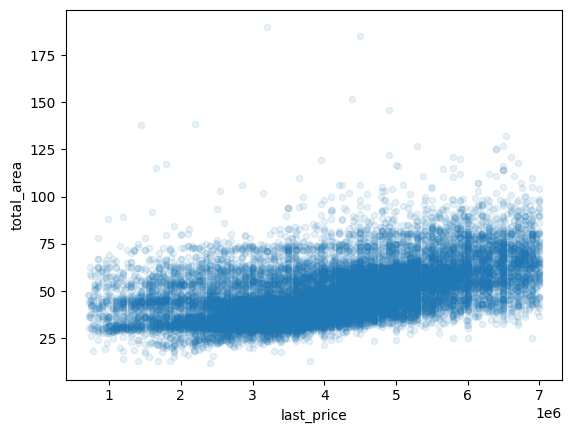

In [ ]:
data_price_07_70.plot(x='last_price', y='total_area', kind='scatter', alpha=0.1)

<font color='green'>    
   Сгруппиуем данные по общей площади объектов по диапазонам: до 30 м, до 50 м, до 70 м, выше 70 м<br>
</font>

In [ ]:
data_price = data_new[data.columns].copy()

In [ ]:
def group_area(area):

    if 0 < area <= 10:
        return '10 м2'
    if 10 < area <= 20:
        return '20 м2'
    if 20 < area <= 30:
        return '30 м2'
    if 30 < area <= 40:
        return '40 м2'
    if 40 < area <= 50:
        return '50 м2'
    if 50 < area <= 60:
        return '60 м2'
    if 60 < area <= 70:
        return '70 м2'
    if 70 < area <= 80:
        return '80 м2'
    if 80 < area <= 90:
        return '90 м2'
    return 'выше 90 м'

data_price['group_area'] = data_price['total_area'].apply(group_area)
data_price.groupby('group_area')['group_area'].count()

group_area
20 м2          35
30 м2         864
40 м2        5143
50 м2        5172
60 м2        3934
70 м2        2813
80 м2        1993
90 м2        1105
выше 90 м    2640
Name: group_area, dtype: int64

In [ ]:
group_area_price = data_price.pivot_table(index='group_area', values='last_price', aggfunc=['median', 'count'])
group_area_price.columns = ['median_price', 'count']
group_area_price.sort_values(by='median_price', ascending=False).head(10)

median_price  count
group_area                     
выше 90 м     13500000.0   2640
90 м2          8400000.0   1105
80 м2          6800000.0   1993
70 м2          5900000.0   2813
60 м2          4950000.0   3934
50 м2          4000000.0   5172
40 м2          3400000.0   5143
30 м2          2792500.0    864
20 м2          1900000.0     35

<font color='green'>    
   Выше указаны медианные цены по диапазонам общей площади для полной базы<br>
</font>

<font color='green'>    
   На графике ниже видно - чем больше площадь, тем выше цена<br>
</font>

In [ ]:
data_price_10 = data_price.query('last_price < 10000000' )

<Axes: xlabel='last_price', ylabel='group_area'>

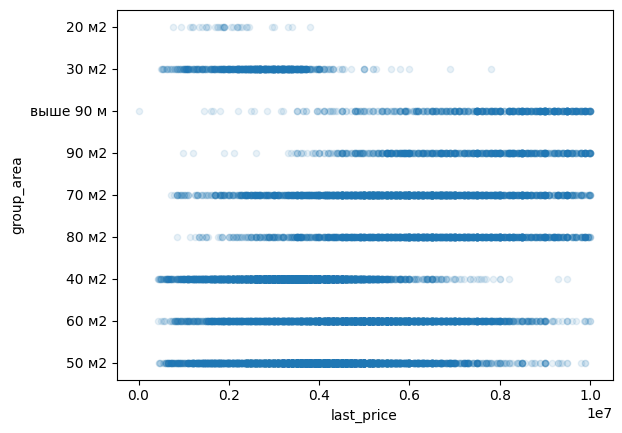

In [ ]:
data_price_10.plot(x='last_price', y='group_area', kind='scatter', alpha=0.1)

<font color='green'>    
   Посмотрим распределение цен для объектов площадью от 60 до 70 метров<br>
</font>

<Axes: >

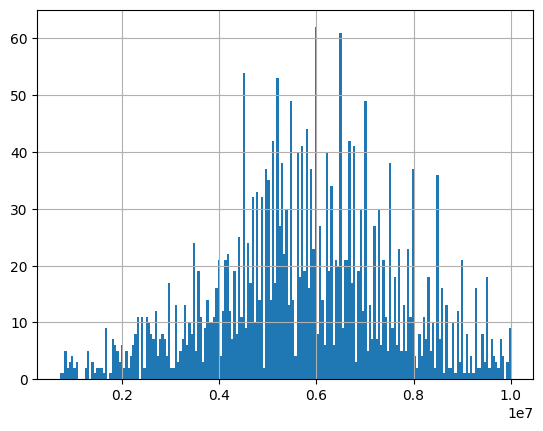

In [ ]:
group_70_price = data_price_10.query('group_area == "70 м2"')
group_70_price['last_price'].hist(bins=200)

<font color='green'>    
   Посмотрим распределение цен для объектов площадью от 60 до 70 метров в Санкт-Петербурге<br>
</font>

<Axes: >

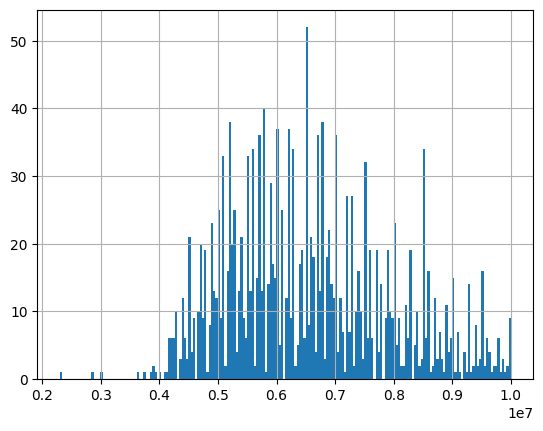

In [ ]:
group_Spb_price = group_70_price.query('locality_name == "Санкт-Петербург"')
group_Spb_price['last_price'].hist(bins=200)

<font color='green'>    
  <h1> Зависимость цены от жилой площади</h1><br>
</font></h2>

<Axes: xlabel='last_price', ylabel='living_area'>

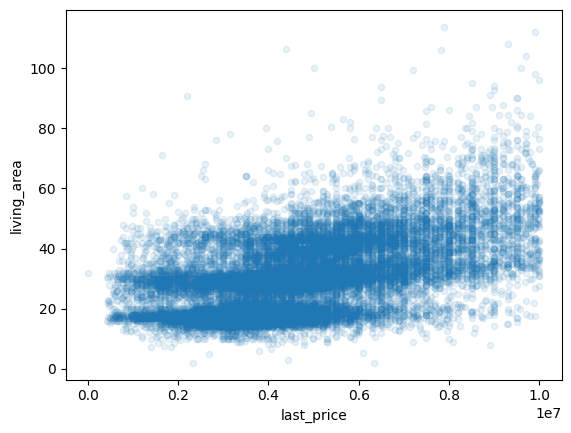

In [ ]:
data_price_10.plot(x='last_price', y='living_area', kind='scatter', alpha=0.1)

<font color='green'>    
  <h1> Зависимость цены от площади кухни</h1><br>
</font></h2>

<Axes: xlabel='last_price', ylabel='kitchen_area'>

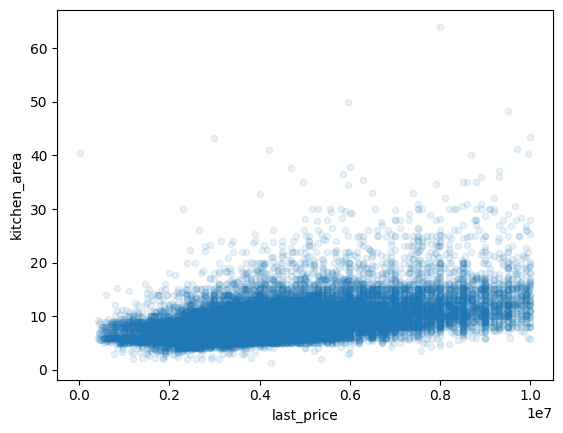

In [ ]:
data_price_10.plot(x='last_price', y='kitchen_area', kind='scatter', alpha=0.1)

<font color='green'>    
  <h1> Зависимость цены от количество комнат</h1><br>
</font></h2>

<Axes: xlabel='last_price', ylabel='rooms'>

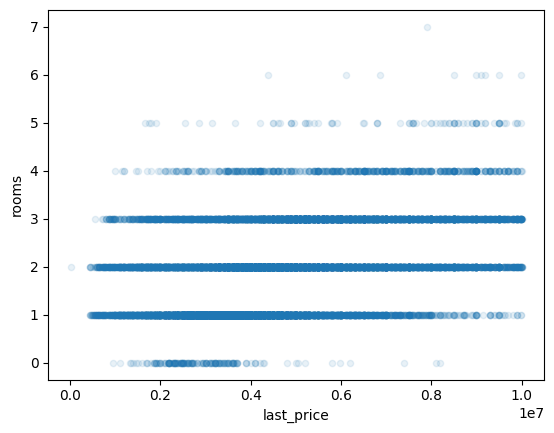

In [ ]:
data_price_10.plot(x='last_price', y='rooms', kind='scatter', alpha=0.1)

<font color='green'>    
  <h1> Зависимость цены от типа этажа, на котором расположена квартира (первый, последний, другой)</h1><br>
</font></h2>

In [ ]:
data_floors_group = data_new.groupby('floors_group')['last_price'].median()
data_floors_group

floors_group
другой         4850000.0
не известно    5249478.0
первый этаж    3900000.0
последний      4300000.0
Name: last_price, dtype: float64

<Axes: xlabel='floors_group'>

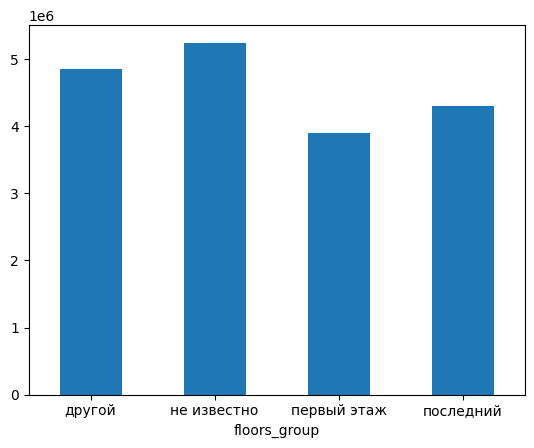

In [ ]:
data_floors_group.plot.bar(rot=0)

<font color='green'>    
   Цена первых и последних этажей пониже средних.<br>
</font>

<font color='green'>    
  <h1> Зависимость цены от даты размещения (день недели, месяц, год)</h1><br>
</font></h2>


<font color='green'>    
  <h1> Зависимость цены от дня недели публикации</h1><br>
</font></h2>

In [ ]:
# data_price_07_70.plot(x='last_price', y='day_week_publication', kind='scatter', alpha=0.01)

In [ ]:
data_day_week_publication = data_new.pivot_table(index='day_week_publication', values='last_price', aggfunc=['median', 'max', 'min', 'count'])
data_day_week_publication.columns = ['median', 'max', 'min', 'count']
data_day_week_publication.sort_values(by='median', ascending=False).head(10)

median          max       min  count
day_week_publication                                         
1                     4730000.0  289238400.0  430000.0   4183
2                     4700000.0  420000000.0   12190.0   3974
0                     4650000.0  300000000.0  430000.0   3612
3                     4650000.0  159984000.0  450000.0   4295
4                     4585000.0  190870000.0  450000.0   4000
5                     4555000.0  763000000.0  550000.0   1936
6                     4550000.0  130000000.0  470000.0   1699

<Axes: xlabel='day_week_publication'>

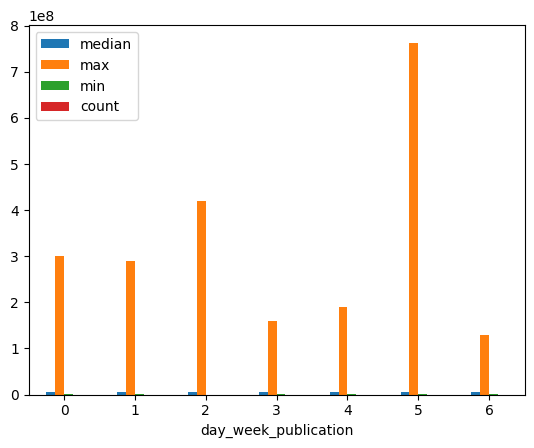

In [ ]:
data_day_week_publication.plot.bar(rot=0)

<font color='green'>    
   Публикаций делают больше в будние дни. При этом недвижимость с максимальной ценой публикуют по субботам, а с минимальной по средам.<br>
</font>

<font color='green'>    
  <h1> Зависимость цены от месяца публикации</h1><br>
</font></h2>

In [ ]:
data_day_month_publication = data_new.pivot_table(index='month_publication', values='last_price', aggfunc=['median', 'max', 'min','count'])
data_day_month_publication.columns = ['median', 'max', 'min','count']
data_day_month_publication.sort_values(by='median', ascending=False).head(12)

median          max       min  count
month_publication                                         
4                  4800000.0  330000000.0  430000.0   2379
9                  4700000.0  763000000.0  520000.0   1981
11                 4700000.0  160000000.0  560000.0   2371
12                 4700000.0  420000000.0  490000.0   1641
2                  4650000.0  401300000.0  450000.0   2640
3                  4650000.0  289238400.0   12190.0   2587
7                  4650000.0  140000000.0  440000.0   1695
1                  4600000.0  180000000.0  480000.0   1500
8                  4570000.0  159984000.0  450000.0   1744
10                 4570000.0  155000000.0  600000.0   2127
5                  4515000.0  230000000.0  490000.0   1274
6                  4400000.0  124480000.0  430000.0   1760

<Axes: xlabel='month_publication'>

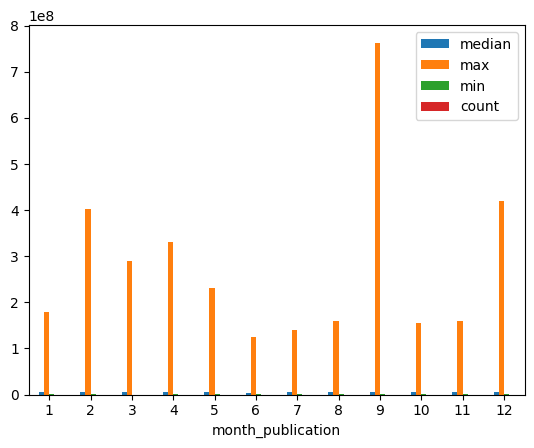

In [ ]:
data_day_month_publication.plot.bar(rot=0)

<font color='green'>    
   Публикаций делают больше всего в феврале и меньше всего в январе. При этом недвижимость с максимальной медианной ценой публикуют в апреле, а с минимальной медианной ценой в июне.<br>
</font>

In [ ]:
data_year_publication = data_new.pivot_table(index='year_publication', values='last_price', aggfunc=['median', 'max', 'min','count'])
data_year_publication.columns = ['median', 'max', 'min','count']
data_year_publication.sort_values(by='median', ascending=False).head(12)

median          max        min  count
year_publication                                          
2014              7700000.0   79339000.0  1200000.0    137
2015              5350000.0  180000000.0   650000.0   1191
2019              5050000.0  289238400.0    12190.0   2879
2016              4550000.0  401300000.0   490000.0   2783
2018              4550000.0  330000000.0   430000.0   8519
2017              4500000.0  763000000.0   450000.0   8190

<Axes: xlabel='year_publication'>

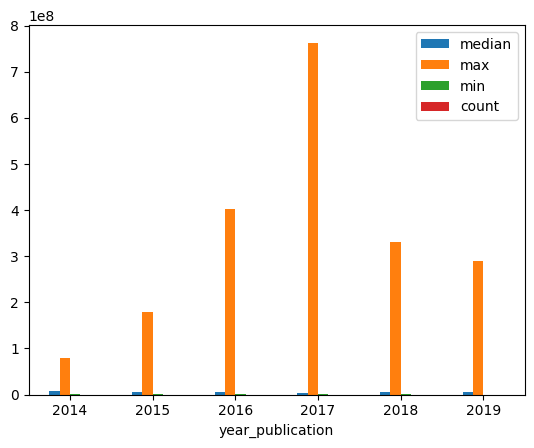

In [ ]:
data_year_publication.plot.bar(rot=0)

<font color='green'>    
   Публикаций сделали больше всего в 2017-2018 годах. Медианная цена недвижимости была больше всего в 2014 году и снизилась к 2017 и 2018 годам<br>
</font>

<br>Для категории этажа, дня, месяца и года продажи нужно построить barplot рассчитав среднее значение или медиану. После этого необходимо написать о зависимости цены от этих параметров

    https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html
</div>

###   Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце locality_name

In [ ]:
data_living_area = data_new.pivot_table(index='locality_name', values='price_m2', aggfunc=['median', 'max', 'min', 'count'])
data_living_area.columns = ['median', 'max_m2', 'min_m2', 'count']
data_living_area.sort_values(by='count', ascending=False).head(10)

median      max_m2    min_m2  count
locality_name                                             
Санкт-Петербург    104761.900  1907500.00    111.83  15721
поселок Мурино      85878.465   138580.25  50000.00    556
поселок Шушары      76876.175   147826.09  47700.42    440
Всеволожск          65789.470   640422.35  31400.00    398
Пушкин             100000.000   256521.74  59836.07    369
Колпино             74723.745   125000.00  47957.37    338
поселок Парголово   91642.860   138522.43  39205.96    327
Гатчина             67796.610   146315.79  10507.25    307
деревня Кудрово     91860.470   142857.14  54160.35    299
Выборг              58158.320   107473.12  18750.00    237

<font color='green'>    
   В списке выше показаны 10 населённых пунктов с наибольшим количеством объявлений. В Санкт_Петербурге недвижимость с самым дорогим "метром" и там же с самым дешёвым. <br>
</font>

In [ ]:
data_living_area.sort_values(by='max_m2', ascending=False).head(10)

median      max_m2    min_m2  count
locality_name                                             
Санкт-Петербург    104761.900  1907500.00    111.83  15721
Всеволожск          65789.470   640422.35  31400.00    398
Зеленогорск        101666.665   323943.66  53303.72     24
Пушкин             100000.000   256521.74  59836.07    369
Петергоф            82142.860   225971.73  51612.90    201
Без названия        89772.730   196648.04  24005.49     49
Сестрорецк          99678.460   182688.17  50434.78    183
поселок Репино      86542.205   175000.00  68870.04      4
поселок Лисий Нос   74525.750   168706.70  58750.00      3
Павловск            85410.200   161428.57  53082.19     38

 <font color='green'>    
   Населённые пункты с самыми высокими ценами за квадратный метр<br>
</font>

In [ ]:
data_living_area.sort_values(by='min_m2', ascending=True).head(10)

median      max_m2    min_m2  count
locality_name                                                      
Санкт-Петербург             104761.900  1907500.00    111.83  15721
поселок станции Свирь        11481.480    15000.00   7962.96      2
Сланцы                       18254.785    43333.33   9615.38    112
деревня Старополье           11000.000    12250.00  10368.66      3
Гатчина                      67796.610   146315.79  10507.25    307
городской поселок Будогощь   36741.665    40540.54  10714.29      4
поселок Оредеж               19877.680    21995.46  11250.00      3
деревня Выскатка             12335.480    13207.55  11463.41      2
деревня Вахнова Кара         11688.310    11688.31  11688.31      1
Луга                         42622.655    71355.76  11904.76     56

 <font color='green'>    
   Населённые пункты с самыми низкими ценами за квадратный метр <br>
</font>

In [ ]:
data_living_area_count = data_living_area.sort_values(by='median', ascending=False).head(10)
data_living_area_median = data_living_area_count.iloc[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],[0]]
data_living_area_median

median
locality_name                
Санкт-Петербург    104761.900
Зеленогорск        101666.665
Кудрово            100000.000
Пушкин             100000.000
Сестрорецк          99678.460
поселок Левашово    96997.690
деревня Кудрово     91860.470
поселок Парголово   91642.860
Мурино              91478.395
деревня Мистолово   90888.890

<Axes: xlabel='locality_name'>

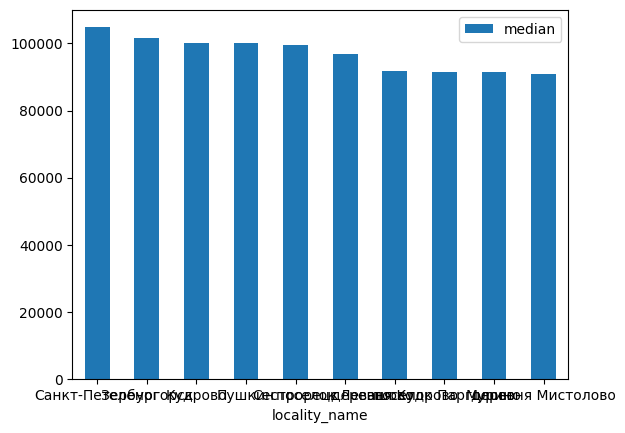

In [ ]:
data_living_area_median.plot.bar(rot=0)

 <font color='green'>    
   На данном графике показаны населённые пункты с самыми высокими медианными ценами в порядке убывания.<br>
</font>

###   На основании данных о расстоянии до центра в километрах, выделим квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислим среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."

In [ ]:
data_cityCenters_nearest_spb_km = data_cityCenters_nearest_spb.pivot_table(index='Centers_km', values='last_price', aggfunc=['median', 'count']).reset_index()
data_cityCenters_nearest_spb_km.columns = ['Centers_km', 'median_price', 'count']
data_cityCenters_nearest_spb_km.sort_values(by='Centers_km', ascending=False).head(10)

Centers_km  median_price  count
29        29.0     4535000.0      6
28        28.0     4990000.0      7
27        27.0     8300000.0      2
26        26.0     3320000.0     53
25        25.0     3794881.0     26
24        24.0     3480000.0     26
23        23.0     4500000.0     85
22        22.0     4925000.0    202
21        21.0     5289476.0    117
20        20.0     5550000.0     49

<Axes: xlabel='last_price', ylabel='Centers_km'>

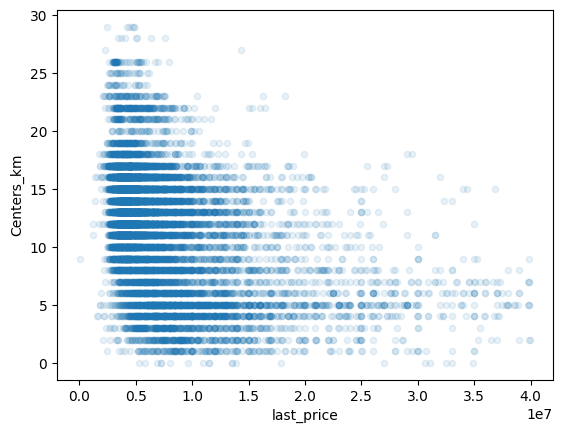

In [ ]:
data_cityCenters_nearest_spb.plot(x='last_price', y='Centers_km', kind='scatter', alpha=0.1)


<font color='green'>    
   Чем ближе к центру тем меньше объектов с низкой ценой и больше объектов с высокой ценой<br>
</font>

## Общий вывод

<font color='green'>
На основании данных из сервиса Яндекс.Недвижимость — архива объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет, была поставлена задача определять рыночную стоимость объектов недвижимости. <br>
<br>
В результате работы были установлены параметры влияющие на ценообразование.<br>
<br>
Для этого были выполнены следующие работы:<br>
<br>
1) Выполнен анализ данных, в результате которого были определены следующие о проблемах с данными: пропуски, дубликаты, неверный тип данных, странные значения и т.д.). Подробное описание проблемных данных:<br>
1.4.2  Анализ пропусков<br>
1.4.3  Анализ дубликатов<br>
1.4.4  Неверный тип данных<br>
1.4.5  Странные значения<br>
<br>
2) Выполнена предобработка данных. Там где данные можно заменить, значения сохраняются в таблице data_new, а где нельзя созданы новые таблицы на основании которых выполнен анализ закономерностей.
<br>
2.1  Заменены пропуски в столбце "Высота потолков"  - наблюдались слишком маленькие значения и слишком большие значения.
Создана новая таблица - data_ceiling_height, заменены значения потолков выше 20 метров на значения делённые на 10. Отсечены значения меньше 2 метров и больше 5.<br>
2.2  Заменены пропуски в столбце "Всего этажей в доме" - таких значений всего 0,4%. Была выполнена замена на (-1) в таблице data_new.<br>
2.3  Заменены пропуски в столбце "Жилая площадь в квадратных метрах (м²))" - данные в этих строках заменены, на число равное общей площади умноженной на средний процент отношения этих площадей в таблице data_new.<br>
2.4  Заменены пропуски в столбце "Апартаменты (булев тип)" - исправлен тип данных, значения 1 - аппартаменты, 0 - не аппартаменты. Значения сохранены в таблице data_new.<br>
2.5  Заменены пропуски в столбце "Площадь кухни в квадратных метрах (м²)" - пропуски заменены медианными значениями отношения общей площади к имеющимся значениям площадей кухонь. Значения сохранены в таблице data_new.<br>
2.6  Заменены пропуски в столбце "Число балконов". Если продавец не указал число балконов, то, скорее всего, в его квартире их нет. - Пропуски заменены на 0. Значения сохранены в таблице data_new.<br>
2.7  Заменены пропуски в столбце "Название населённого пункта" на "Без названия", значения сохранены в таблице data_new.<br>
2.8  Найдены и устранены неявные дубликаты в столбце "Название населённого пункта", значения сохранены в таблице data_new.<br>
2.9  Удалены пропуски в столбце "Расстояние до ближайшего аэропорта в метрах (м)" - неполные данные сохранены в таблице data_airports_nearest для дальнейшего анализа.<br>
2.10  Удалены пропуски в столбце "Расстояние до центра города (м)" - для дальнейшего анализа неполные данные сохранены в таблицу: data_cityCenters_nearest.<br>
2.11  Удалены пропуски в столбце "Число парков в радиусе 3 км" - для дальнейшего анализа неполные данные сохранены в таблицу: data_parks.<br>
2.12  Удалены пропуски в столбце "Расстояние до ближайшего парка (м)" - для дальнейшего анализа неполные данные сохранены в таблицу: data_parks.<br>
2.13  Заменены пропуски в столбце "Число водоёмов в радиусе 3 км" - для дальнейшего анализа неполные данные сохранены в таблицу: data_ponds<br>
2.14  Замена пропусков в столбце "Расстояние до ближайшего водоёма (м)" - для дальнейшего анализа неполные данные сохранены в таблицу: data_ponds<br>
2.15  Замена пропусков в столбце "Сколько дней было размещено объявление (от публикации до снятия)" - для дальнейшего анализа неполные данные сохранены в таблицу: data_support_days.<br>
<br>
3)  Посчитаны и добавлены в таблицу новые столбцы<br>
<br>
· цена одного квадратного метра;<br>
· день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);<br>
· месяц публикации объявления;<br>
· год публикации объявления;<br>
· тип этажа квартиры (значения — «‎первый», «последний», «другой»);<br>
· расстояние до центра города в километрах.<br>
<br>
4)  Проведён исследовательский анализ данных<br>
<br>
4.1  Общая площадь. Определены данные выпадающие из общего диапазона. Удалены данные о квартирах у которых общая площадь больше 150 м2. В результате среза данных будет потеряно 2,4% данных. Данные сохранены в таблицу: data_150m. - 69% Положительной корреляции цены квартиры и общей площади.<br>
<br>
4.2  Жилая площадь. Исследование выполнено на основании таблицы data_150m. Исследование выявило наличие пяти объектов с процентным отношением жилой площади к общей меньше 10%. Данные проигнорированы. На диаграмме распределения значений явно прослеживается зависимый набор данных. Положительная корреляция цены квартиры и жилой площади в 57%.<br>
<br>
4.3  Площадь кухни. Исследование выполнено на основании таблицы data_150m. Положительная корреляция цены квартиры и площади кухни - 54%.<br>
<br>
4.4  Цена объекта. Определены данные выпадающие из общего диапазона. Удалены верхние значения выше 15 млн. Данные представлены в миллионах. В результате среза данных будет потеряно 5% данных. Данные сохранены в таблицу: data_price_15mln. Найдены медианные стоимости квартир в регионах по убыванию и построена гистограмма.<br>
<br>
А также выполнено разделение данного списка на три группы по критерию стоимости недвижимости - низкая (до 1,6 млн), средняя (до 2,5 млн), высокая (свыше 2,5 млн.). Построены три отдельных гистограммы. Выведены списки регионов по этим группам.<br>
<br>
4.5  Количество комнат. Выпадающих данных нет. Наблюдается высокая корреляция числа комнат и общей площади - 76%, а также корреляция числа комнат к продажной цене - 36%. Больше всего продаётся 1, 2, 3, 4-х комнатные квартиры. Чем больше комнат, тем дороже квартира. Найдено распределение цен "однушек", "двушек" и т.д. Данные сохранены в таблицах:
data_new_1k, data_new_2k, data_new_3k, data_new_4k, data_new_5k, data_new_6k, data_new_7k, data_new_8k<br>
<br>
4.6  Высота потолков - самым "популярным" значением для реализуемых квартир - потолок высотой 2.5 метра и средней ценой 4,08 млн. руб.. Дорогие квартиры имеют высокие потолки. Корреляция значений высот потолков и цен на объект недвижимости 39%<br>
<br>
4.7  Тип этажа квартиры («первый», «последний», «другой»). <br>
<br>
Изучено распределение цен по этажам для 1, 2, 3-х комнатных квартир:<br>
<br>
1) Положительная корреляция цен и этажей 60%: этажи растут - цены растут.<br>
2) Отрицательная корреляция количества объектов и этажей 60%: этажи растут - объектов становится меньше. На высоких этажах, однокомнатных квартир продают меньше.<br>
3) До пятого этажа квартиры имеют равномерно минимальные цены. (Хрущевки). Третий и четвёртые этажи - чуть дороже.<br>

4.7.1  Однокомнатные квартиры<br>
4) Медианная цена однокомнатных квартир: для первых и последних этажей дешевле промежуточных на 16%.<br>
<br>
4.7.2   Двухкомнатные квартиры<br>
4) Медианная цена двухкомнатных квартир: для первых и последних этажей дешевле промежуточных на 19%.<br>
<br>
4.7.3   Трёхкомнатные квартиры<br>
4) Медианная цена трёхкомнатных квартир: для первых и последних этажей дешевле промежуточных на 12,5%.<br>
5) Многокомнатных квартир на верхних этажах наблюдается мало.<br>
<br>
Изучено распределение цен категориям этажей («первый», «последний», «другой») для 1, 2, 3-х и комнатных квартир. Построен график, на котором отображено количество квартир по каждой из категорий этажей.<br>
<br>
4.8  Общее количество этажей в доме.<br>
<br>
Найдено распределение этажности домов по количеству.<br>
Найдено распределение средних цен на квартиры в разноэтажных домах.<br>
<br>
Для полного набора данных:<br>
1) Больше всего домов 5-ти и 9-ти этажей<br>
2) Наблюдается слабая положительная корреляция - чем выше дом тем дороже квартира;<br>
3) Наблюдается средняя отрицательная корреляция - чем выше дом, тем меньше площадь квартиры.<br>
<br>
Для сегментированных наборов:<br>
1) Для однокомнатных и трёхкомнатных квартир - чем выше дом, тем больше квартира и дороже.<br>
2) Для двухкомнатных квартир - цена квартиры дорожает, а вот площадь не сильно растёт.<br>
<br>
4.9  Расстояние до центра города в метрах. Определена корреляция данных - расстояния до центра и цены квартиры; расстояния до центра и и количества комнат квартиры. Наблюдается средняя отрицательная корреляция: ближе к центру дороже - 21%  и ближе к центру больше комнат - 18%.<br>
<br>
4.10  Расстояние до ближайшего парка. Данные в таблице data_parks сгруппированы по квартилям. Наблюдается слабая отрицательная корреляция, ближе к парку - дороже.<br>
<br>
4.11  Как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.<br>
Со временем сервис стал работать лучше (Видимо появился контроль проданных квартир и данные стали удаляться) или покупательская способность подросла. В 2019 году медианное время продажи квартиры равнялось 23 дням. Самая долгая продажа 1580 дней в 2014 году. Самая быстрая 1 день - в 2019 году.<br>
<br>
Наблюдаютмя пики снятия с продаж 30, 45, 60 и 90.<br>
<br>
4.12  "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Построены графики, которые показывают зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией использованы сводные таблицы.<br>
<br>
1) Зависимость цены от общей площади. Сгруппированы данные по общей площади объектов по диапазонам: до 30 м, до 50 м, до 70 м, выше 70 м<br>
2) Зависимость цены от жилой площади.<br>
3) Зависимость цены от площади кухни.<br>
4) Зависимость цены от количество комнат. <br>
5) Зависимость цены от типа этажа, на котором расположена квартира (первый, последний, другой) - Цена первых и последних этажей ниже средних.<br>
6) Зависимость цены от даты размещения (день недели, месяц, год)<br>
<br>
- Публикаций делают больше в будние дни. При этом недвижимость с максимальной ценой публикуют по субботам, а с минимальной по средам.<br>
- Публикаций делают больше всего в феврале и меньше всего в январе. При этом недвижимость с максимальной медианной ценой публикуют в апреле, а с минимальной медианной ценой в июне.<br>
- Публикаций сделали больше всего в 2017-2018 годах. Медианная цена недвижимости была больше всего в 2014 году и снизилась к 2017 и 2018 годам.<br>
<br>
4.13  Посчитана средня цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделены населённые пункты с самой высокой и низкой стоимостью квадратного метра.<br>
<br>
В списке показаны 10 населённых пунктов с наибольшим количеством объявлений по убыванию. В Санкт_Петербурге недвижимость с самым дорогим "метром" и там же с самым дешёвым. : Санкт-Петербург, поселок Мурино, поселок Шушары, Всеволожск, Пушкин, Колпино, поселок Парголово, Гатчина, деревня Кудрово, Выборг.<br>
<br>
Населённые пункты с самыми высокими ценами за квадратный метр: Санкт-Петербург, Всеволожск, Зеленогорск, Пушкин, Петергоф, Без названия, Сестрорецк, поселок Репино, поселок Лисий Нос, Павловск.<br>
<br>
Населённые пункты с самыми низкими ценами за квадратный метр: Санкт-Петербург, поселок станции Свирь, Сланцы, деревня Старополье, Гатчина, городской поселок Будогощь, поселок Оредеж, деревня Выскатка, деревня Вахнова Кара, Луга.<br>
<br>
Населённые пункты с самыми низкими медианными ценами за квадратный метр: <br>
Санкт-Петербург	104761.900<br>
Зеленогорск	101666.665<br>
Кудрово	100000.000<br>
Пушкин	100000.000<br>
Сестрорецк	99678.460<br>
поселок Левашово	96997.690<br>
деревня Кудрово	91860.470<br>
поселок Парголово	91642.860<br>
Мурино	91478.395<br>
деревня Мистолово	90888.890<br>
<br>
4.14  На основании данных о расстоянии до центра в километрах, выделены квартиры в Санкт-Петербурге и вычислены средние цены каждого километра.<br>
<br>
Чем ближе к центру тем меньше объектов с низкой ценой и больше объектов с высокой ценой.<br>
<font>

<font color='green'>    
   Резюме:
    <br>
    1) Цены на объекты недвижимости растут в зависимости от увеличения площади и пропорционально жилой площади, а также площади кухни. <br>
   2) Зависят от факторов показателя социального благополучия. Ближе к центру - дороже. Чем больше парков и прудов - дороже. В новом жилье цены дороже. <br>
    3) Влияниие близости аэропорта незначительно. <br>
    4) Людям не нравятся первые и последние этажи, особенно в "хрущевках". <br>
    5) С ростом количества этажей в здании, стоимость квартир не уменьшается. <br>
    6) Многокомнатные квартиры хуже "появляются" на высоких этажах. <br>
    7) Самые распространённые здания 9 и 5 этажей. Самые распространённые комнатности - 1 и 2. <br>
</font>